## COSC 3337: Data Science I - Group Project
### Team: Naomi Ayub, Elyjaiah Durden, Nirmal John
### Task Category: Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats, signal
from sklearn.preprocessing import MinMaxScaler
from statsmodels.nonparametric.smoothers_lowess import lowess
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set the style for seaborn plots
sns.set(style="whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')

# Set display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Load the data
# Since we're working with the data from the artifact, we'll read it directly
print("Loading COVID-19 data...")
file_path = 'preprocessed_covid_data.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("\n1. BASIC DATA EXPLORATION")
print("="*40)
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows of the dataset:")
display(df.head())

print("\nDataset information:")
display(df.info())

print("\nBasic statistics:")
display(df.describe())

# Check for missing values
print("\nMissing values per column:")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 
                             'Percentage': missing_percentage})
display(missing_data.sort_values('Missing Values', ascending=False))


Loading COVID-19 data...

1. BASIC DATA EXPLORATION
Dataset shape: (412909, 72)

First few rows of the dataset:


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,daily_case_change_rate,daily_death_change_rate,hospitalization_rate,icu_rate,case_fatality_rate
0,AFG,Asia,Afghanistan,2020-01-05,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,54.42,18.60,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.50,64.83,0.51,41128772,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00
1,AFG,Asia,Afghanistan,2020-01-06,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,54.42,18.60,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.50,64.83,0.51,41128772,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00
2,AFG,Asia,Afghanistan,2020-01-07,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,54.42,18.60,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.50,64.83,0.51,41128772,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00
3,AFG,Asia,Afghanistan,2020-01-08,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,54.42,18.60,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.50,64.83,0.51,41128772,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00
4,AFG,Asia,Afghanistan,2020-01-09,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,54.42,18.60,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.50,64.83,0.51,41128772,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412909 entries, 0 to 412908
Data columns (total 72 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    412909 non-null  object 
 1   continent                                   392784 non-null  object 
 2   location                                    412909 non-null  object 
 3   date                                        412909 non-null  object 
 4   total_cases                                 412909 non-null  float64
 5   new_cases                                   412909 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                412909 non-null  float64
 8   new_deaths                                  412909 non-null  float64
 9   new_deaths_smoothed                         4093

None


Basic statistics:


,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,daily_case_change_rate,daily_death_change_rate,hospitalization_rate,icu_rate,case_fatality_rate
count,412909.00,412909.00,408929.00,412909.00,412909.00,409378.00,411804.00,410159.00,408929.00,411804.00,410608.00,409378.00,183797.00,34825.00,34825.00,35442.00,35442.00,10993.00,10993.00,19666.00,19666.00,78427.00,74502.00,78427.00,74502.00,102179.00,102179.00,94956.00,93398.00,73704.00,69746.00,66663.00,44441.00,59733.00,181282.00,73704.00,69746.00,66663.00,44441.00,181282.00,178637.00,178637.00,192948.00,357640.00,330856.00,320812.00,327508.00,325834.00,211987.00,327508.00,344248.00,247156.00,243808.00,161736.00,290680.00,386098.00,317464.00,412909.00,13293.00,13293.00,13293.00,13293.00,412909.00,412909.00,412909.00,412909.00,412909.00
mean,7379488.97,7963.96,8041.03,81318.38,71.45,72.06,112096.20,122.36,122.71,835.51,0.76,0.76,0.91,720.28,16.51,4163.54,126.60,317.89,9.67,4905.89,82.76,21330416.52,67924.26,928.33,3.30,144054.90,2.78,0.10,2419.23,451508914.46,198787885.86,183524444.01,120949848.52,632023.83,223900.11,120.32,52.28,47.56,34.93,1821.05,83784.33,0.07,42.90,318.94,30.32,8.64,5.45,18505.90,13.93,265.30,8.56,10.77,33.10,50.65,3.11,73.60,0.72,131274160.71,56497.82,9.83,10.92,1783.03,0.01,0.00,0.00,0.00,0.10
std,44916957.00,228899.72,86616.11,442136.43,1364.52,513.64,162240.41,1508.78,559.70,1134.93,6.98,2.55,0.40,2254.89,23.74,10395.66,156.75,514.41,13.57,11985.57,91.50,84585253.33,249146.96,2192.23,9.08,1148014.91,7.22,0.12,33612.02,1817093564.59,790780481.06,733575340.56,435905571.15,3131603.32,1795697.56,84.41,29.49,29.00,29.04,3141.40,729647.85,0.18,24.97,1449.28,9.05,6.09,4.14,19261.00,20.07,120.56,4.95,10.76,13.85,31.91,2.55,7.36,0.15,669052459.62,157487.75,12.07,24.41,1995.60,0.05,0.04,0.00,0.00,8.12
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,15.10,1.14,0.53,661.24,0.10,79.37,0.99,0.10,7.70,1.19,0.10,53.28,0.39,47.00,-37726.10,-44.23,-95.92,-2936.45,0.00,0.00,0.00,0.00,0.00
25%,6342.00,0.00,0.00,43.00,0.00,0.00,1916.10,0.00,0.00,24.57,0.00,0.00,0.72,24.00,2.37,195.00,29.64,17.00,1.55,313.00,23.65,376394.00,2302.00,45.06,0.29,1498.00,0.20,0.02,7.10,1604910.75,868918.00,841814.50,490648.00,1680.00,242.00,42.64,26.07,20.44,5.91,103.00,39.00,0.00,22.22,37.73,22.00,3.51,2.06,3823.19,0.60,175.69,5.35,1.90,22.60,20.86,1.30,69.50,0.60,409989.00,185.80,2.17,-1.50,126.19,0.00,0.00,0.00,0.00,0.00
50%,63257.00,0.00,12.00,789.00,0.00,0.00,29145.47,0.00,2.79,295.09,0.00,0.00,0.95,104.00,6.68,831.00,70.89,92.00,4.64,10


Missing values per column:


,Missing Values,Percentage
weekly_icu_admissions_per_million,401916,97.34
weekly_icu_admissions,401916,97.34
excess_mortality_cumulative,399616,96.78
excess_mortality_cumulative_absolute,399616,96.78
excess_mortality_cumulative_per_million,399616,96.78
excess_mortality,399616,96.78
weekly_hosp_admissions_per_million,393243,95.24
weekly_hosp_admissions,393243,95.24
icu_patients,378084,91.57
icu_patients_per_million,378084,91.57


In [2]:
# 2. DATA CLEANING AND PREPROCESSING
# ==================================
print("\n2. DATA CLEANING AND PREPROCESSING")
print("="*40)

# Convert date to datetime format
df['date'] = pd.to_datetime(df['date'])
print("Date column converted to datetime.")

# Check for duplicate entries
duplicates = df.duplicated().sum()
print(f"Number of duplicate entries: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicate entries removed.")

# Fill NaN values for key columns
key_columns = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths']
print("\nFilling NaN values for key columns...")

# Forward-fill total_cases and total_deaths for each location
df[['total_cases', 'total_deaths']] = df.groupby('location')[['total_cases', 'total_deaths']].ffill()

# Fill NA in "new_cases" and "new_deaths" with 0 where total_cases/total_deaths exist
df.loc[df['total_cases'].notna(), 'new_cases'] = df.loc[df['total_cases'].notna(), 'new_cases'].fillna(0)
df.loc[df['total_deaths'].notna(), 'new_deaths'] = df.loc[df['total_deaths'].notna(), 'new_deaths'].fillna(0)

# Create derived metrics
print("\nCreating derived metrics...")
df['case_fatality_rate'] = df['total_deaths'] / df['total_cases'].replace(0, np.nan)
df['hospitalization_rate'] = df['hosp_patients'] / df['population']
df['icu_rate'] = df['icu_patients'] / df['population']
df['testing_rate'] = df['total_tests'] / df['population']
df['vaccination_rate'] = df['people_fully_vaccinated'] / df['population']
df['daily_case_change_rate'] = df['new_cases'] / df['total_cases'].replace(0, np.nan)
df['daily_death_change_rate'] = df['new_deaths'] / df['total_deaths'].replace(0, np.nan)

# Handle infinite values
df = df.replace([np.inf, -np.inf], np.nan)

# Check updated missing values for our derived metrics
derived_metrics = ['case_fatality_rate', 'hospitalization_rate', 'icu_rate', 
                  'testing_rate', 'vaccination_rate', 'daily_case_change_rate', 
                  'daily_death_change_rate']
print("\nMissing values in derived metrics:")
display(df[derived_metrics].isnull().sum())



2. DATA CLEANING AND PREPROCESSING
Date column converted to datetime.
Number of duplicate entries: 0

Filling NaN values for key columns...

Creating derived metrics...

Missing values in derived metrics:


case_fatality_rate          29304
hospitalization_rate       377467
icu_rate                   378084
testing_rate               334482
vaccination_rate           346246
daily_case_change_rate      29304
daily_death_change_rate     52361
dtype: int64

In [3]:
# 3. COUNTRY TREND ANALYSIS
# =========================
print("\n3. COUNTRY TREND ANALYSIS")
print("="*40)

top_countries_by_cases = df.groupby('location')['total_cases'].max().sort_values(ascending=False).head(10).index.tolist()
print(f"Top 10 countries by total cases: {top_countries_by_cases}")

top_countries_data = df[df['location'].isin(top_countries_by_cases)]

def plot_country_trends(country_name):
    country_data = df[df['location'] == country_name].sort_values('date')
    
    fig, axes = plt.subplots(3, 1, figsize=(14, 18), sharex=True)
    
    axes[0].plot(country_data['date'], country_data['total_cases'], 
                color='blue', linewidth=2)
    axes[0].set_title(f'{country_name}: Total COVID-19 Cases Over Time', fontsize=16)
    axes[0].set_ylabel('Total Cases', fontsize=14)
    axes[0].tick_params(axis='y', labelsize=12)
    axes[0].grid(True, linestyle='--', alpha=0.7)
    
    axes[1].plot(country_data['date'], country_data['total_deaths'], 
                color='red', linewidth=2)
    axes[1].set_title(f'{country_name}: Total COVID-19 Deaths Over Time', fontsize=16)
    axes[1].set_ylabel('Total Deaths', fontsize=14)
    axes[1].tick_params(axis='y', labelsize=12)
    axes[1].grid(True, linestyle='--', alpha=0.7)
    
    if country_data['hosp_patients'].notna().any():
        axes[2].plot(country_data['date'], country_data['hosp_patients'], 
                    color='purple', linewidth=2)
        axes[2].set_title(f'{country_name}: COVID-19 Hospitalizations Over Time', fontsize=16)
        axes[2].set_ylabel('Hospital Patients', fontsize=14)
    else:
        axes[2].text(0.5, 0.5, 'No hospitalization data available', 
                    horizontalalignment='center', verticalalignment='center',
                    transform=axes[2].transAxes, fontsize=14)
        axes[2].set_title(f'{country_name}: COVID-19 Hospitalizations (No Data)', fontsize=16)
    
    axes[2].set_xlabel('Date', fontsize=14)
    axes[2].tick_params(axis='x', labelsize=12, rotation=45)
    axes[2].tick_params(axis='y', labelsize=12)
    axes[2].grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.3)
    return fig

def plot_multiple_countries_trend(metric, countries, title):
    plt.figure(figsize=(14, 8))
    
    fig = px.line(
        top_countries_data[top_countries_data['location'].isin(countries)],
        x='date',
        y=metric,
        color='location',
        title=title,
        labels={metric: metric.replace('_', ' ').title(), 'date': 'Date', 'location': 'Country'},
        line_shape='spline',
        render_mode='svg'
    )
    
    fig.update_layout(
        xaxis_title='Date',
        yaxis_title=metric.replace('_', ' ').title(),
        legend_title='Country',
        hovermode='closest',
        template='plotly_white'
    )
    
    return fig

def detect_waves(country_data, metric='new_cases_smoothed', window=7, prominence=0.3):
    """
    Detect waves in epidemic data using peak detection
    
    Parameters:
    country_data: DataFrame containing country epidemic data
    metric: Column name to analyze for waves
    window: Rolling window size for smoothing
    prominence: Minimum prominence of peaks
    
    Returns:
    peaks: Array of indices where peaks occur
    properties: Dictionary with peak properties
    """
    data = country_data.sort_values('date')
    
    if metric not in data.columns or data[metric].isna().all():
        return None, None
    
    smoothed = data[metric].fillna(0).rolling(window=window, center=True).mean()
    
    if smoothed.max() > 0:
        normalized = smoothed / smoothed.max()
    else:
        return None, None
    
    peaks, properties = signal.find_peaks(normalized, prominence=prominence)
    
    return peaks, properties

def plot_country_waves(country_name, metric='new_cases_smoothed'):
    country_data = df[df['location'] == country_name].sort_values('date')
    
    if country_data.shape[0] < 10 or metric not in country_data.columns or country_data[metric].isna().all():
        return None
    
    peaks, properties = detect_waves(country_data, metric)
    
    if peaks is None or len(peaks) == 0:
        return None
    
    plt.figure(figsize=(16, 8))
    plt.plot(country_data['date'], country_data[metric], 'b-', label=metric.replace('_', ' ').title())
    
    peak_dates = country_data['date'].iloc[peaks]
    peak_values = country_data[metric].iloc[peaks]
    plt.plot(peak_dates, peak_values, 'ro', markersize=10, label='Wave Peaks')
    
    for i, (date, value) in enumerate(zip(peak_dates, peak_values)):
        plt.axvline(x=date, color='r', linestyle='--', alpha=0.3)
        plt.text(date, value*1.05, f'Wave {i+1}', horizontalalignment='center')
    
    plt.title(f'COVID-19 Waves in {country_name} ({metric.replace("_", " ").title()})', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel(metric.replace('_', ' ').title(), fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    return plt.gcf()


3. COUNTRY TREND ANALYSIS
Top 10 countries by total cases: ['World', 'High-income countries', 'Asia', 'Europe', 'Upper-middle-income countries', 'European Union (27)', 'North America', 'United States', 'China', 'Lower-middle-income countries']


In [4]:
# 4. CORRELATION ANALYSIS
# =======================
print("\n4. CORRELATION ANALYSIS")
print("="*40)

def plot_correlation_heatmap(country_name):
    country_data = df[df['location'] == country_name].copy()
    
    correlation_columns = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 
                          'hosp_patients', 'icu_patients', 'total_tests', 
                          'people_vaccinated', 'people_fully_vaccinated',
                          'case_fatality_rate', 'hospitalization_rate', 'icu_rate']
    
    available_columns = [col for col in correlation_columns if col in country_data.columns and not country_data[col].isna().all()]
    
    if len(available_columns) < 3:
        return None, available_columns  
    
    correlation_matrix = country_data[available_columns].corr()
    
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix))
    heatmap = sns.heatmap(
        correlation_matrix, 
        annot=True, 
        mask=mask,
        cmap='coolwarm', 
        vmin=-1, vmax=1, 
        fmt='.2f',
        linewidths=0.5,
        cbar_kws={"shrink": .8}
    )
    plt.title(f'Correlation Matrix for {country_name}', fontsize=16)
    plt.tight_layout()
    
    return plt.gcf(), available_columns


4. CORRELATION ANALYSIS


In [6]:
# 5. OUTLIER DETECTION
# ====================
print("\n5. OUTLIER DETECTION")
print("="*40)

def detect_outlier_countries():
    latest_data = df.sort_values('date').groupby('location').last().reset_index()
    
    significant_countries = latest_data[latest_data['total_cases'] >= 1000].copy()
    
    significant_countries['case_fatality_rate'] = significant_countries['total_deaths'] / significant_countries['total_cases']
    
    Q1 = significant_countries['case_fatality_rate'].quantile(0.25)
    Q3 = significant_countries['case_fatality_rate'].quantile(0.75)
    IQR = Q3 - Q1
    
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    
    high_outliers = significant_countries[significant_countries['case_fatality_rate'] > upper_bound]
    low_outliers = significant_countries[significant_countries['case_fatality_rate'] < lower_bound]
    
    plt.figure(figsize=(14, 8))
    ax = sns.boxplot(x=significant_countries['case_fatality_rate'], color='lightblue')
    ax.set_title('Distribution of Case Fatality Rates Across Countries', fontsize=16)
    ax.set_xlabel('Case Fatality Rate', fontsize=14)
    plt.tight_layout()
    
    plt.figure(figsize=(16, 10))
    scatter = plt.scatter(
        significant_countries['total_cases'], 
        significant_countries['case_fatality_rate'] * 100,  
        alpha=0.7,
        c=significant_countries['gdp_per_capita'],
        cmap='viridis',
        s=100
    )
    
    cbar = plt.colorbar(scatter)
    cbar.set_label('GDP per Capita', fontsize=12)
    
    major_countries = significant_countries[
        significant_countries['location'].isin(['United States', 'India', 'Brazil', 'Sweden', 'United Kingdom', 'New Zealand', 'South Korea'])
    ]

    outliers = significant_countries[
        (significant_countries['case_fatality_rate'] > upper_bound) |
        (significant_countries['case_fatality_rate'] < lower_bound)
    ]

    to_annotate = pd.concat([outliers, major_countries]).drop_duplicates(subset='location')

    for idx, row in to_annotate.iterrows():
        plt.annotate(
            row['location'],
            (row['total_cases'], row['case_fatality_rate'] * 100),
            xytext=(5, 5),
            textcoords='offset points',
            fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
        )
    
    plt.title('Case Fatality Rate vs. Total Cases by Country', fontsize=16)
    plt.xlabel('Total Cases (log scale)', fontsize=14)
    plt.ylabel('Case Fatality Rate (%)', fontsize=14)
    plt.xscale('log')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    return high_outliers, low_outliers, plt.gcf()


5. OUTLIER DETECTION


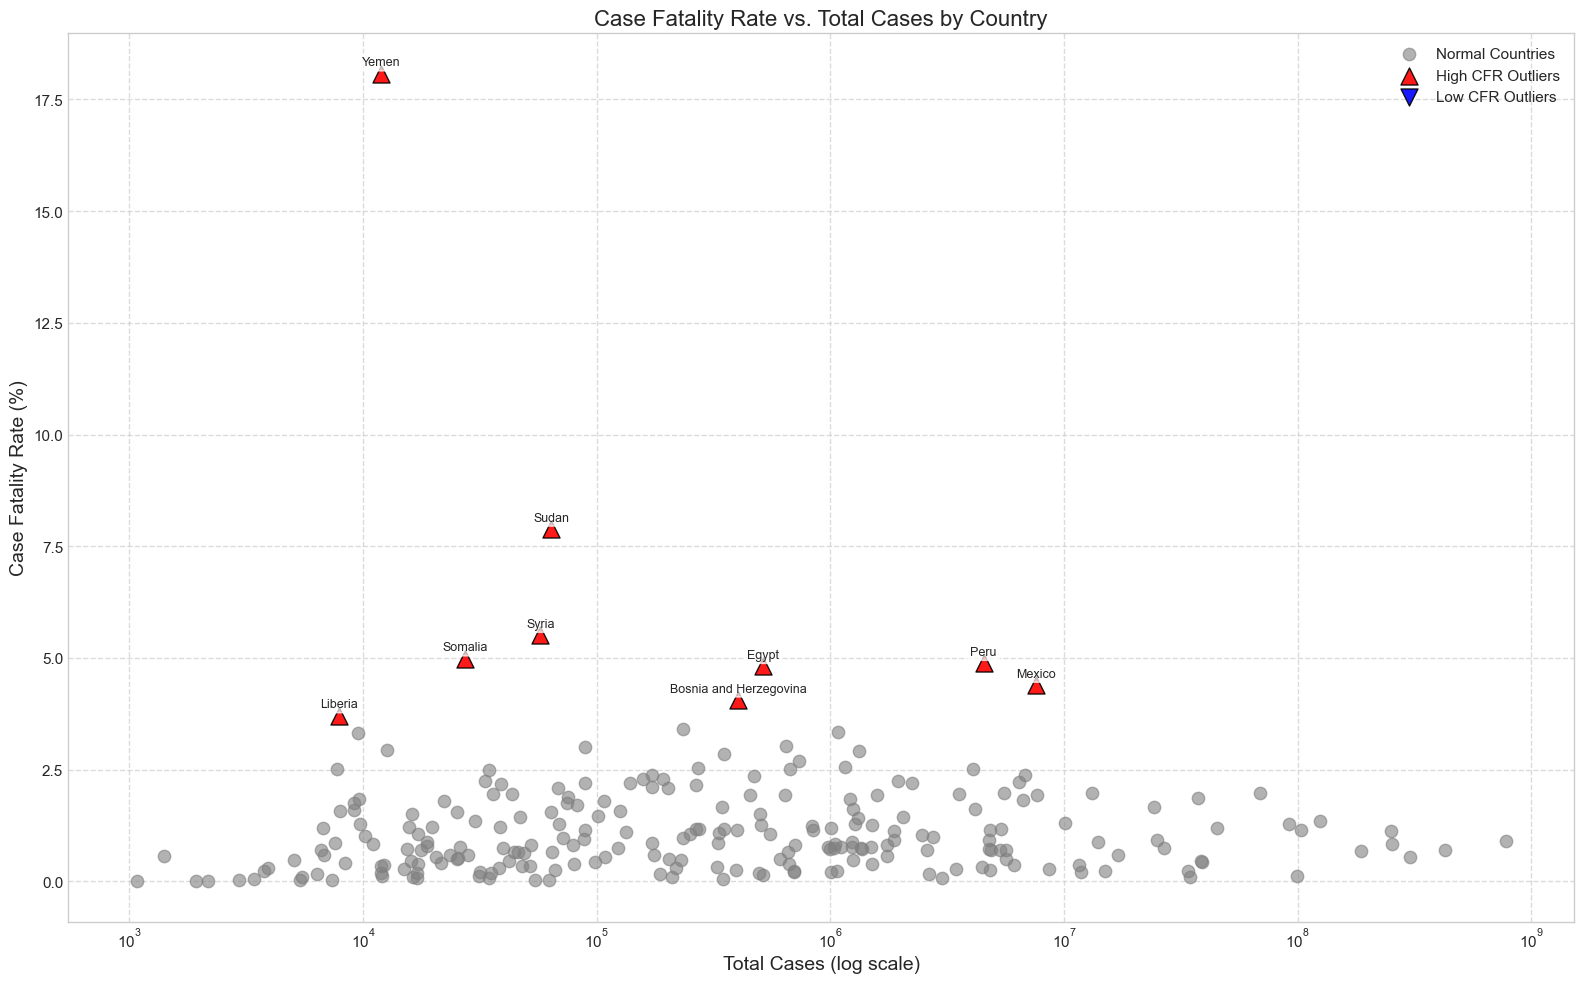

In [7]:
def detect_outlier_countries():
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd

    latest_data = df.sort_values('date').groupby('location').last().reset_index()
    
    significant_countries = latest_data[latest_data['total_cases'] >= 1000].copy()
    
    significant_countries['case_fatality_rate'] = significant_countries['total_deaths'] / significant_countries['total_cases']
    
    Q1 = significant_countries['case_fatality_rate'].quantile(0.25)
    Q3 = significant_countries['case_fatality_rate'].quantile(0.75)
    IQR = Q3 - Q1
    
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    
    high_outliers = significant_countries[significant_countries['case_fatality_rate'] > upper_bound]
    low_outliers = significant_countries[significant_countries['case_fatality_rate'] < lower_bound]
    
    normal = significant_countries[
        (significant_countries['case_fatality_rate'] >= lower_bound) & 
        (significant_countries['case_fatality_rate'] <= upper_bound)
    ]
    
    plt.figure(figsize=(16, 10))
    
    plt.scatter(
        normal['total_cases'], 
        normal['case_fatality_rate'] * 100, 
        alpha=0.6, c='gray', s=80, label='Normal Countries'
    )

    plt.scatter(
        high_outliers['total_cases'], 
        high_outliers['case_fatality_rate'] * 100, 
        alpha=0.9, c='red', edgecolor='black', s=150, label='High CFR Outliers', marker='^'
    )

    plt.scatter(
        low_outliers['total_cases'], 
        low_outliers['case_fatality_rate'] * 100, 
        alpha=0.9, c='blue', edgecolor='black', s=150, label='Low CFR Outliers', marker='v'
    )
    

    for idx, row in pd.concat([high_outliers, low_outliers]).iterrows():
        plt.annotate(
            row['location'],
            (row['total_cases'], row['case_fatality_rate'] * 100),
            textcoords="offset points",
            xytext=(0, 6),
            ha='center',
            fontsize=9,
            bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.7)
        )
    
    # Final plot adjustments
    plt.xscale('log')
    plt.title('Case Fatality Rate vs. Total Cases by Country', fontsize=16)
    plt.xlabel('Total Cases (log scale)', fontsize=14)
    plt.ylabel('Case Fatality Rate (%)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    
    return high_outliers, low_outliers, plt.gcf()

high_outliers, low_outliers, fig = detect_outlier_countries()
plt.show()

In [8]:
# 6. VACCINATION ANALYSIS
# =======================
print("\n6. VACCINATION ANALYSIS")
print("="*40)

def plot_vaccination_progress():
    # Filter for countries with vaccination data
    vacc_data = df[df['people_fully_vaccinated'].notna()]
    
    # Get the latest data for each country
    latest_vacc_data = vacc_data.sort_values('date').groupby('location').last().reset_index()
    
    # Calculate vaccination rate (% of population)
    latest_vacc_data['vaccination_rate'] = latest_vacc_data['people_fully_vaccinated'] / latest_vacc_data['population'] * 100
    
    # Sort by vaccination rate and get top 20
    top_vacc_countries = latest_vacc_data.sort_values('vaccination_rate', ascending=False).head(20)
    
    # Create bar plot
    plt.figure(figsize=(14, 10))
    ax = sns.barplot(
        x='vaccination_rate',
        y='location',
        data=top_vacc_countries,
        palette='viridis'
    )
    
    # Add percentage labels to bars
    for i, v in enumerate(top_vacc_countries['vaccination_rate']):
        ax.text(v + 0.5, i, f'{v:.1f}%', color='black', va='center', fontweight='bold')
    
    plt.title('Top 20 Countries by COVID-19 Vaccination Rate', fontsize=16)
    plt.xlabel('Percentage of Population Fully Vaccinated', fontsize=14)
    plt.ylabel('Country', fontsize=14)
    plt.tight_layout()
    
    return plt.gcf(), top_vacc_countries


6. VACCINATION ANALYSIS


In [9]:
# 7. GEOSPATIAL ANALYSIS
# ======================
print("\n7. GEOSPATIAL ANALYSIS")
print("="*40)

def create_choropleth_map():
    # Get latest data for each country
    latest_data = df.sort_values('date').groupby('location').last().reset_index()
    
    # Calculate cases per million
    latest_data['cases_per_million'] = latest_data['total_cases'] / latest_data['population'] * 1000000
    
    # Create choropleth map
    fig = px.choropleth(
        latest_data,
        locations='iso_code',
        color='cases_per_million',
        hover_name='location',
        color_continuous_scale='YlOrRd',
        projection='natural earth',
        title='COVID-19 Cases per Million by Country',
        hover_data=['total_cases', 'total_deaths', 'case_fatality_rate']
    )
    
    fig.update_layout(
        coloraxis_colorbar=dict(
            title='Cases per Million',
        ),
        geo=dict(
            showframe=False,
            showcoastlines=True,
            projection_type='equirectangular'
        )
    )
    
    return fig


7. GEOSPATIAL ANALYSIS



Executing analysis on the COVID-19 dataset...

Performing Country Trend Analysis...
Number of countries/regions in the dataset: 246
Countries being analyzed: ['United States', 'India', 'Brazil', 'United Kingdom', 'Sweden', 'South Korea', 'New Zealand']

Creating trend visualizations...

Detecting COVID-19 waves...
- Detected waves for United States
- Detected waves for India
- Detected waves for Brazil
- Detected waves for United Kingdom
- Detected waves for Sweden
- Detected waves for South Korea
- Detected waves for New Zealand

Performing Correlation Analysis...
- Created correlation heatmap for United States with 12 variables
- Created correlation heatmap for India with 8 variables
- Created correlation heatmap for Brazil with 8 variables
- Created correlation heatmap for United Kingdom with 12 variables
- Created correlation heatmap for Sweden with 12 variables
- Created correlation heatmap for South Korea with 12 variables
- Created correlation heatmap for New Zealand with 8 var

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

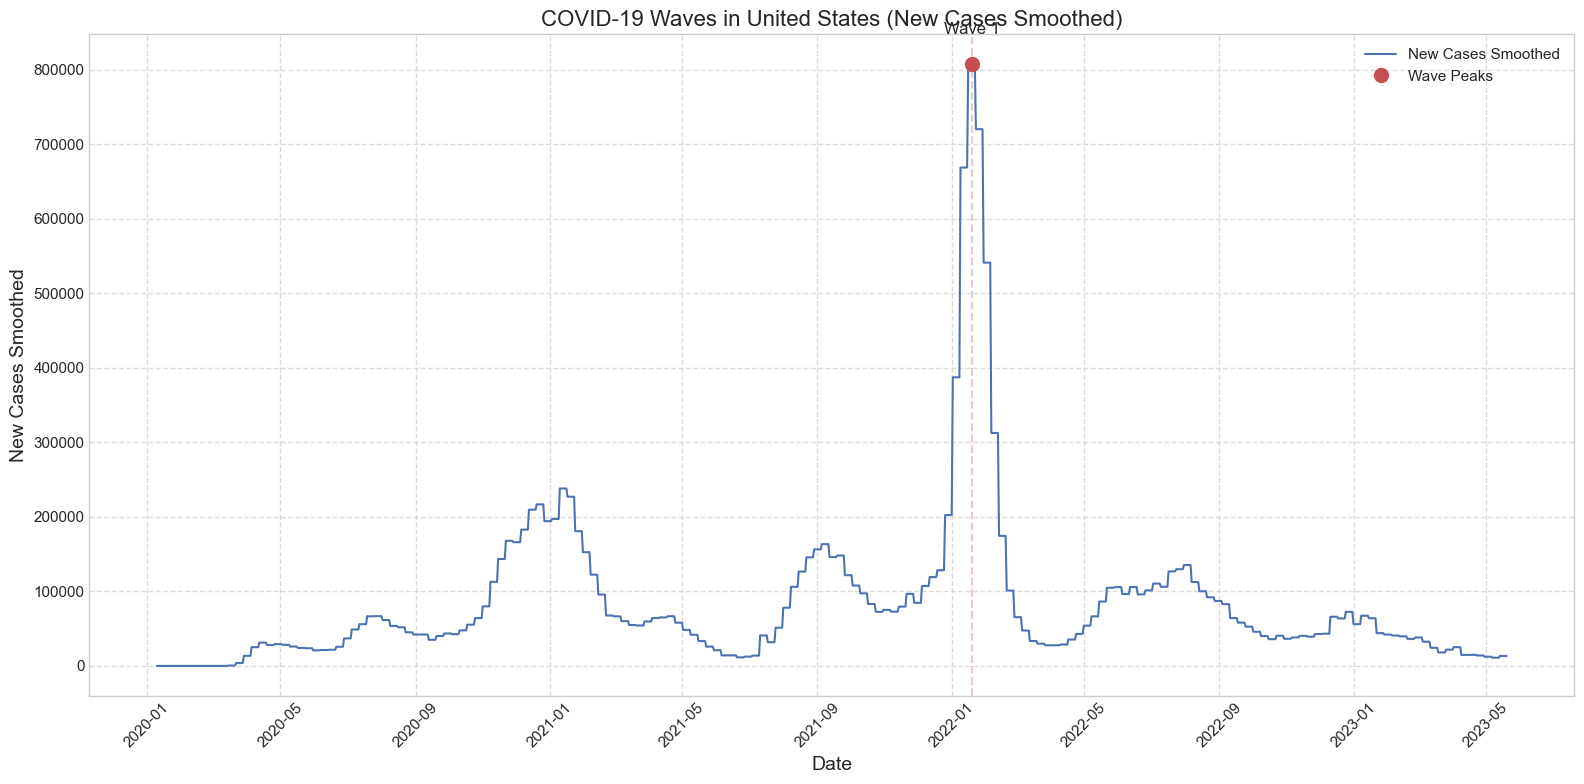

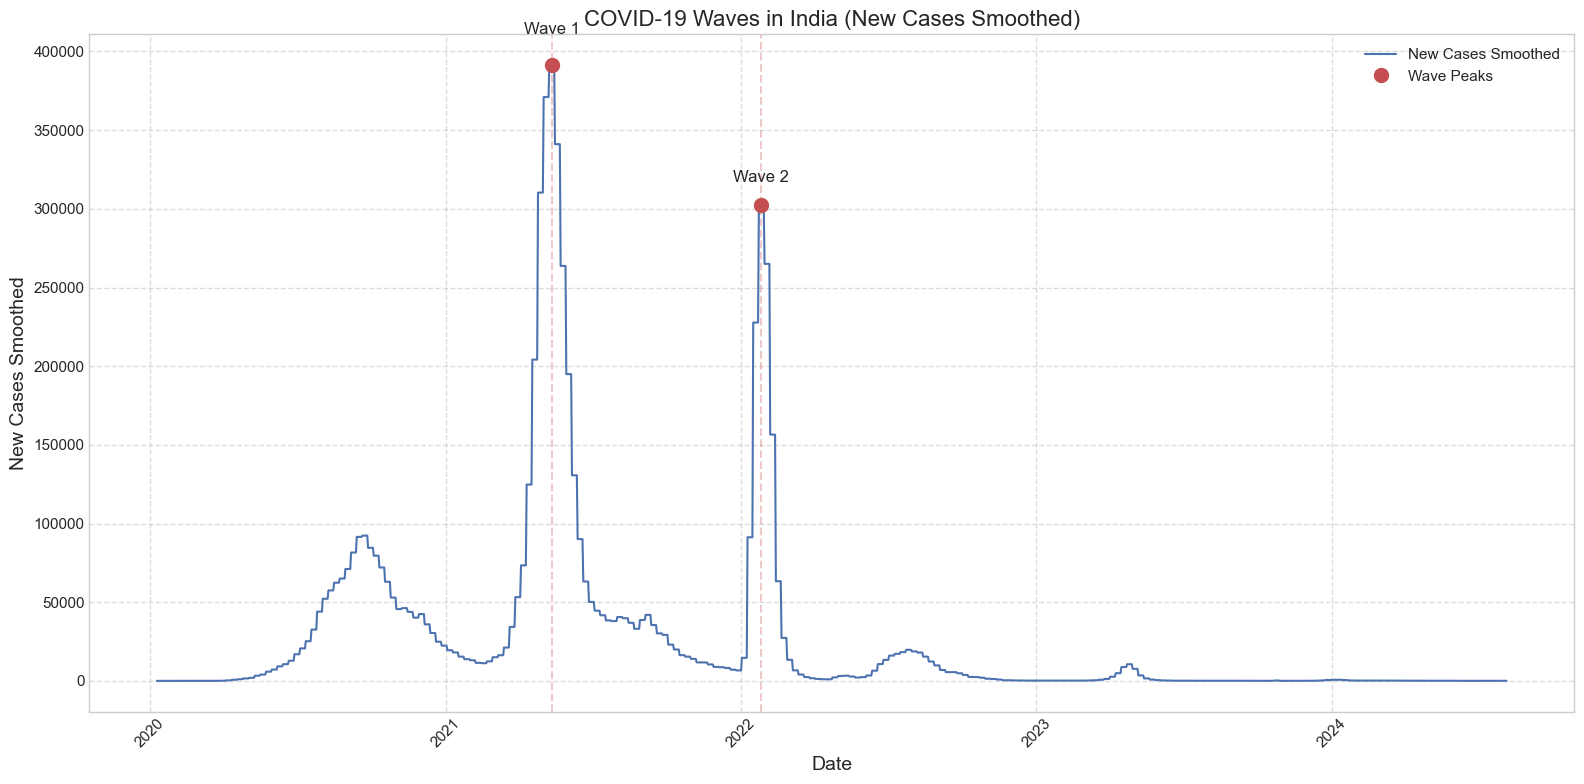

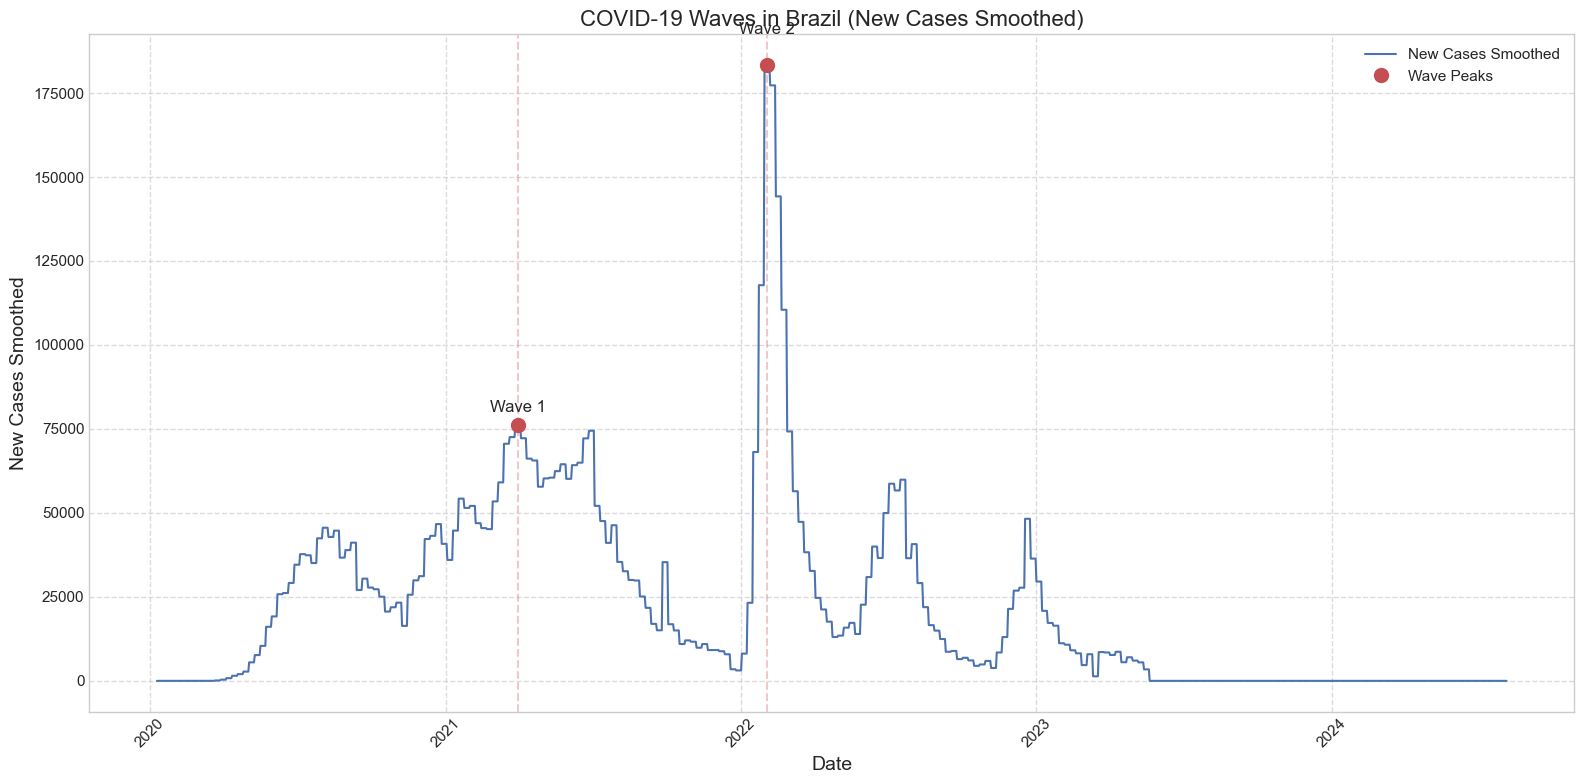

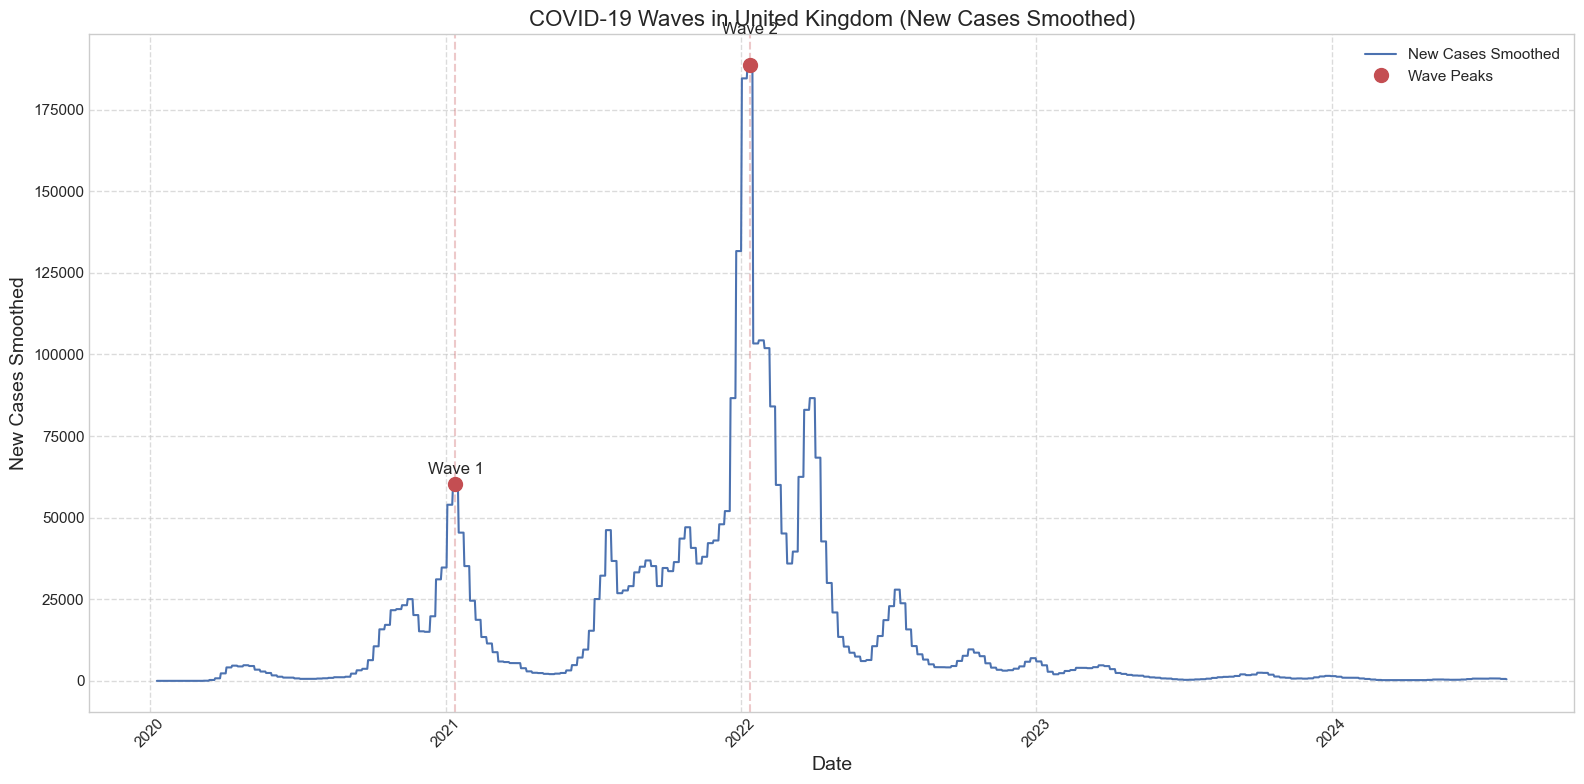

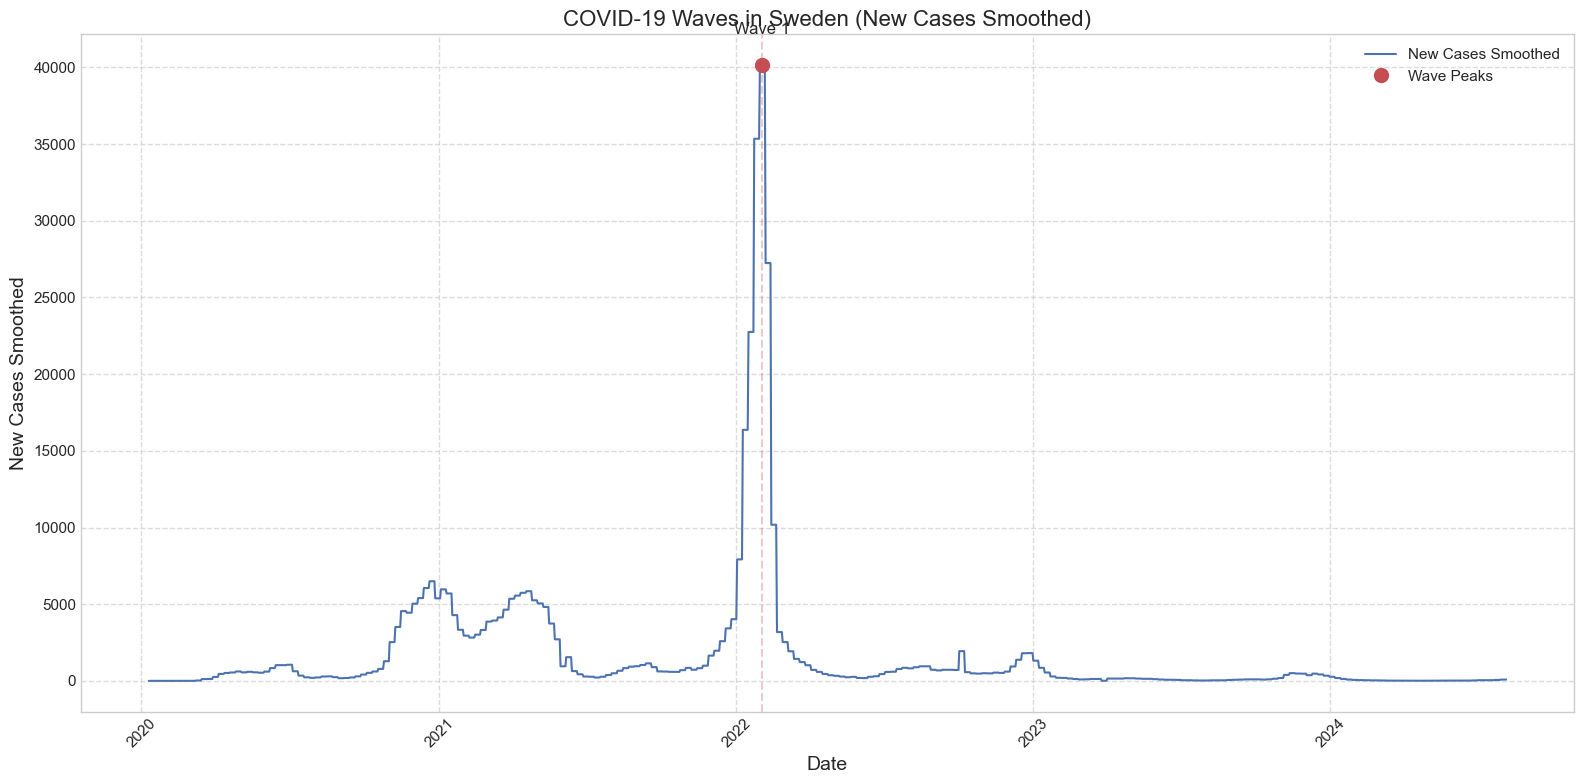

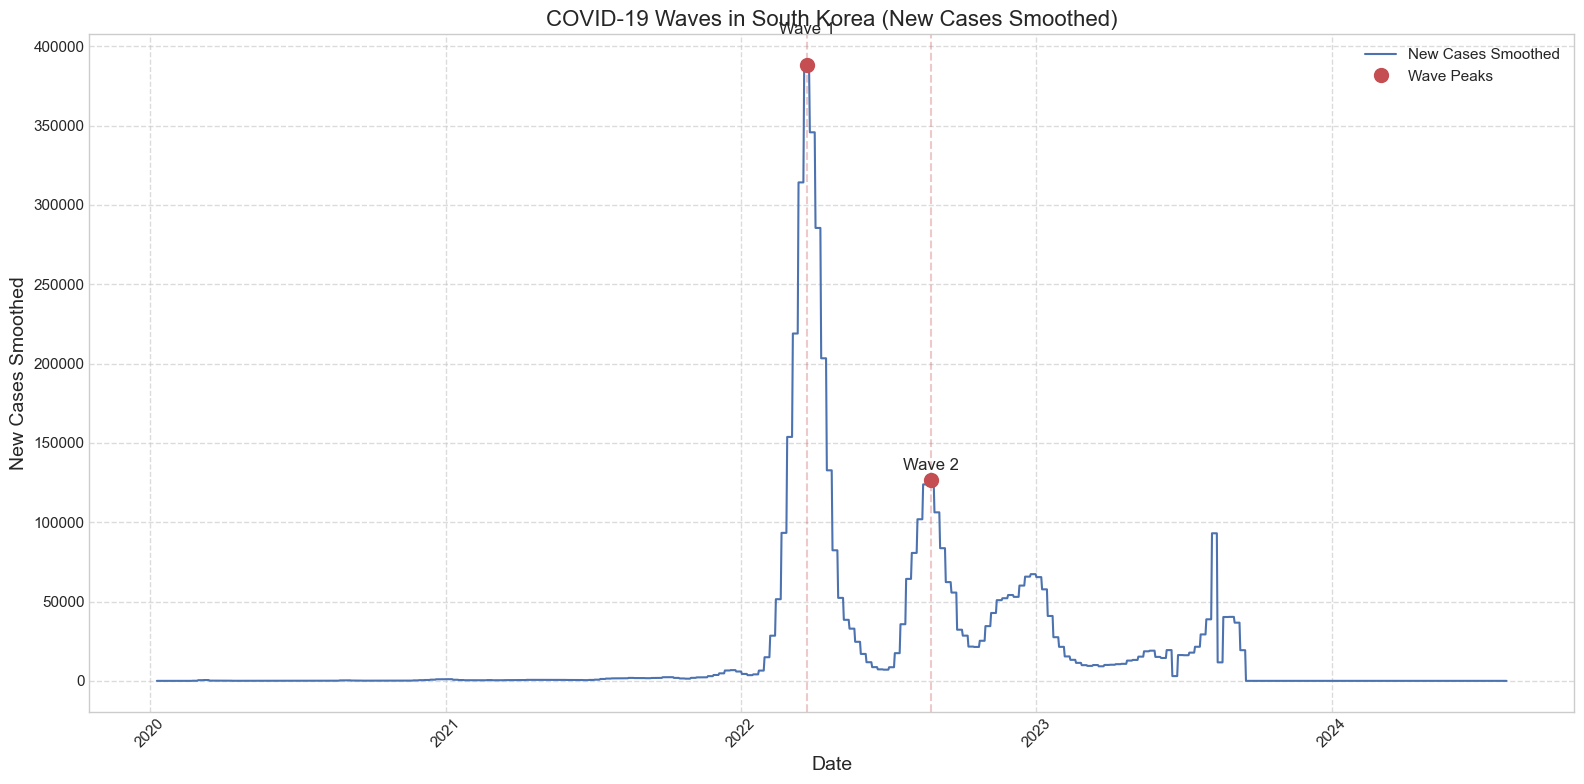

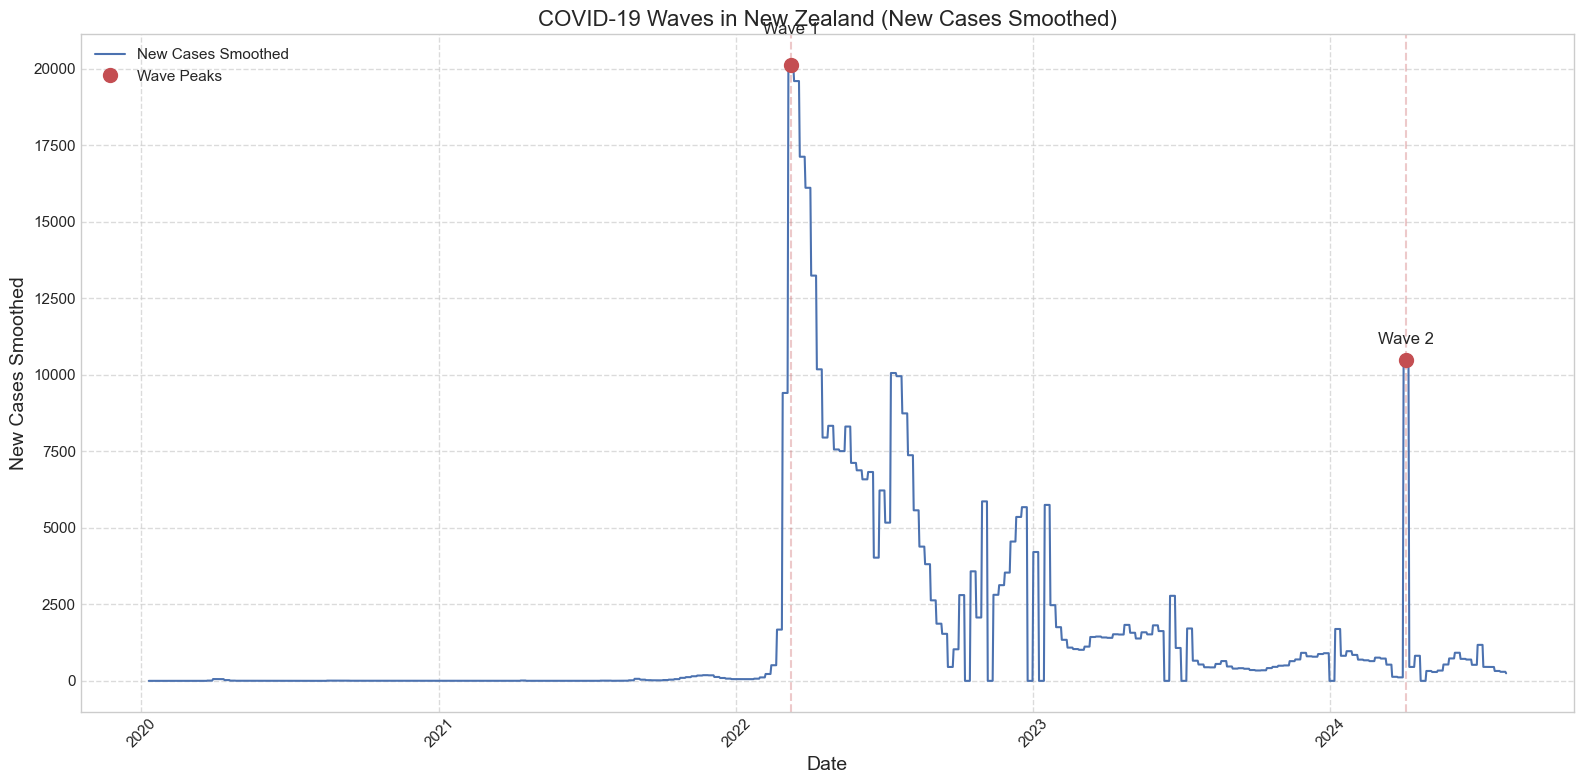

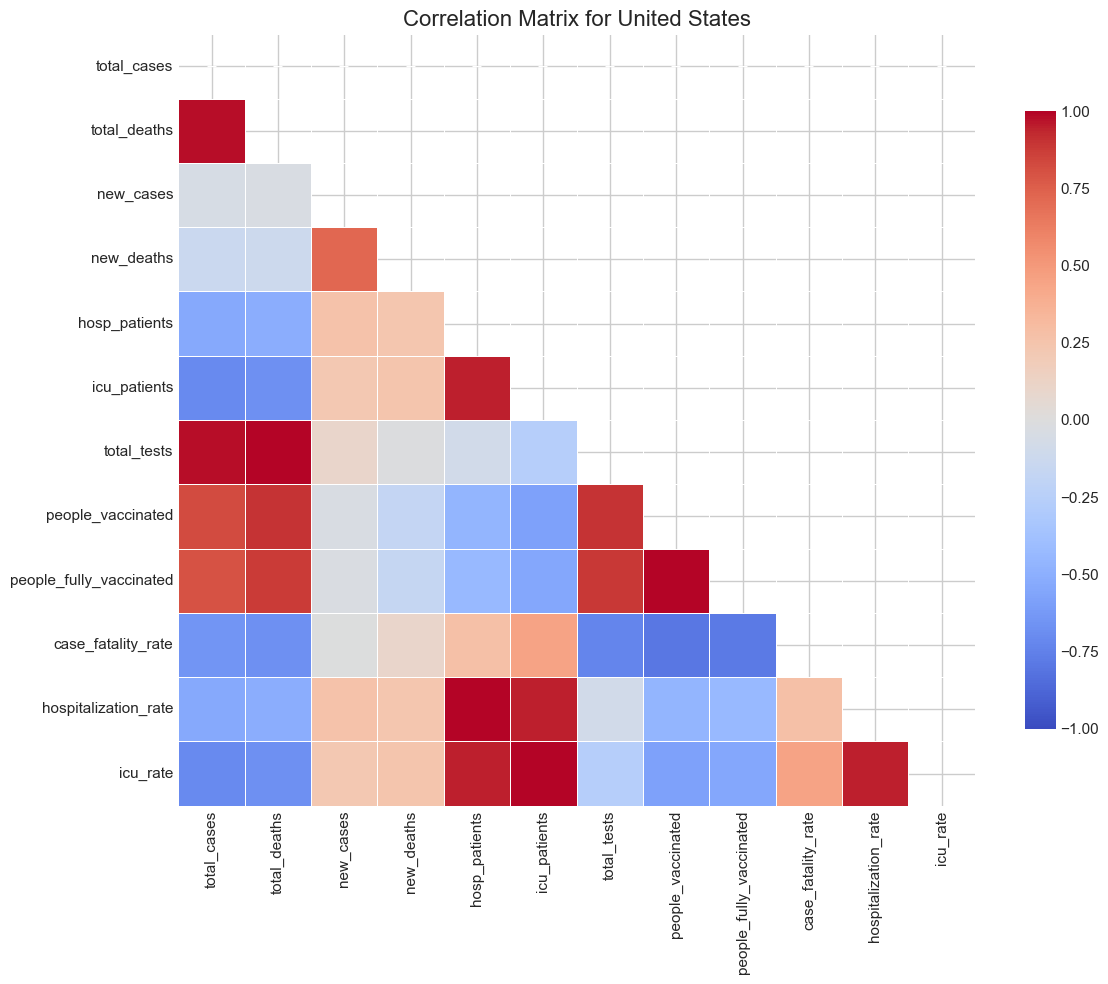

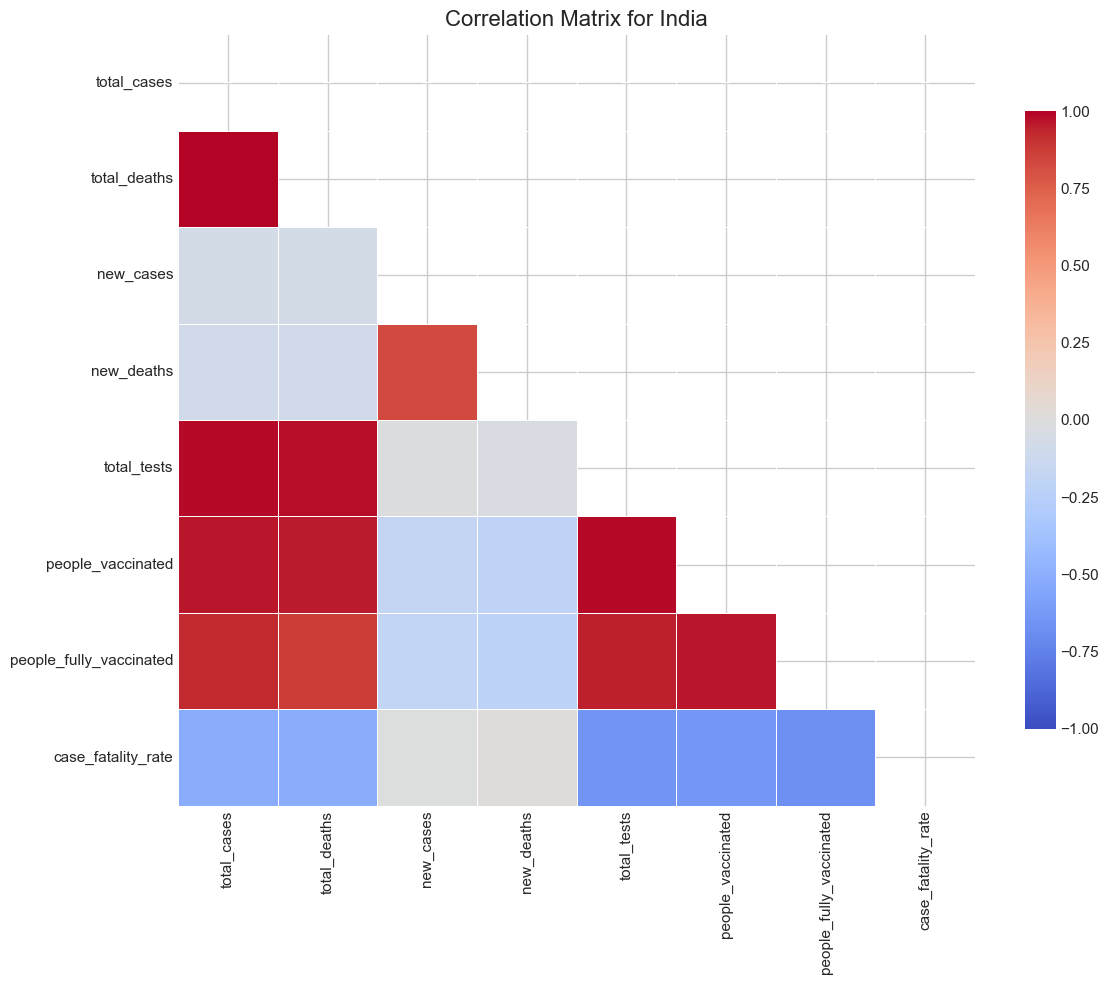

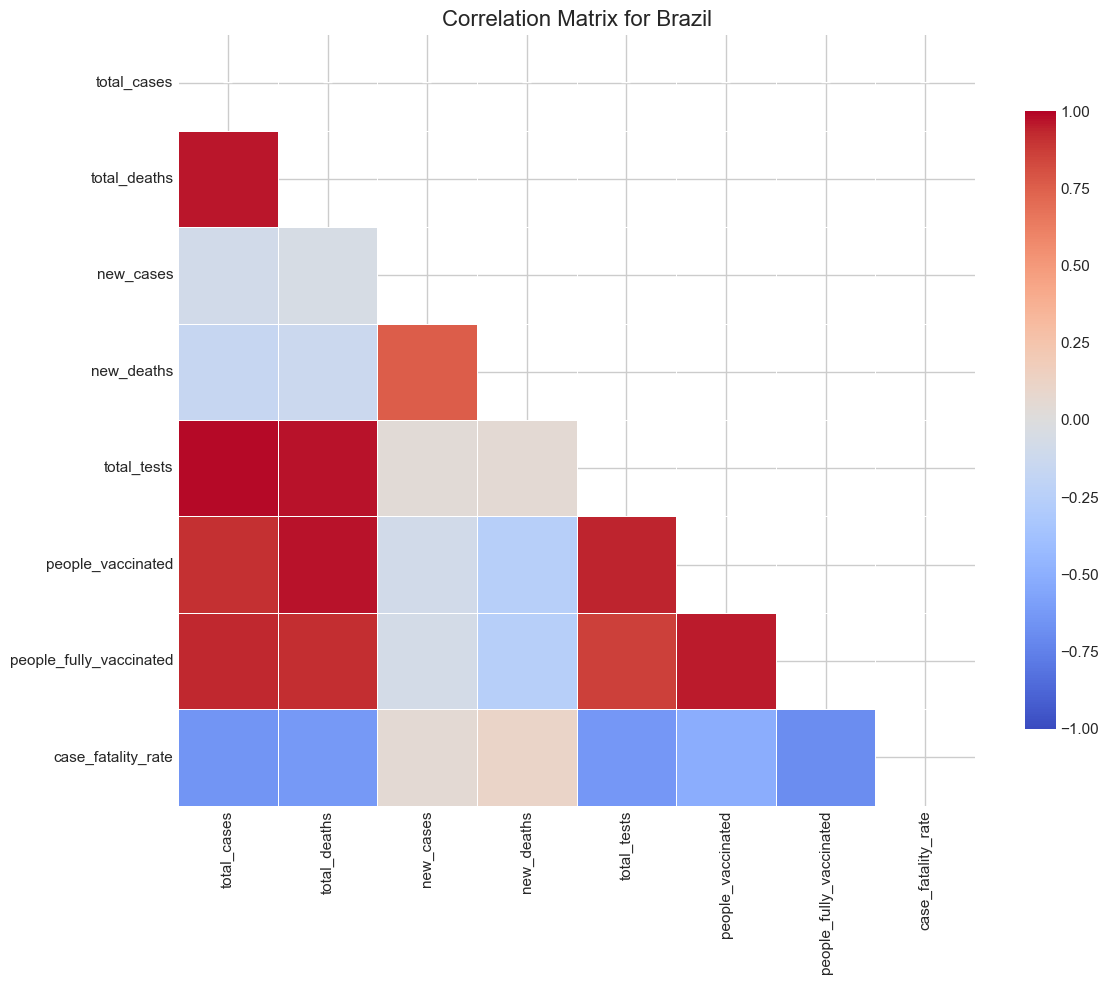

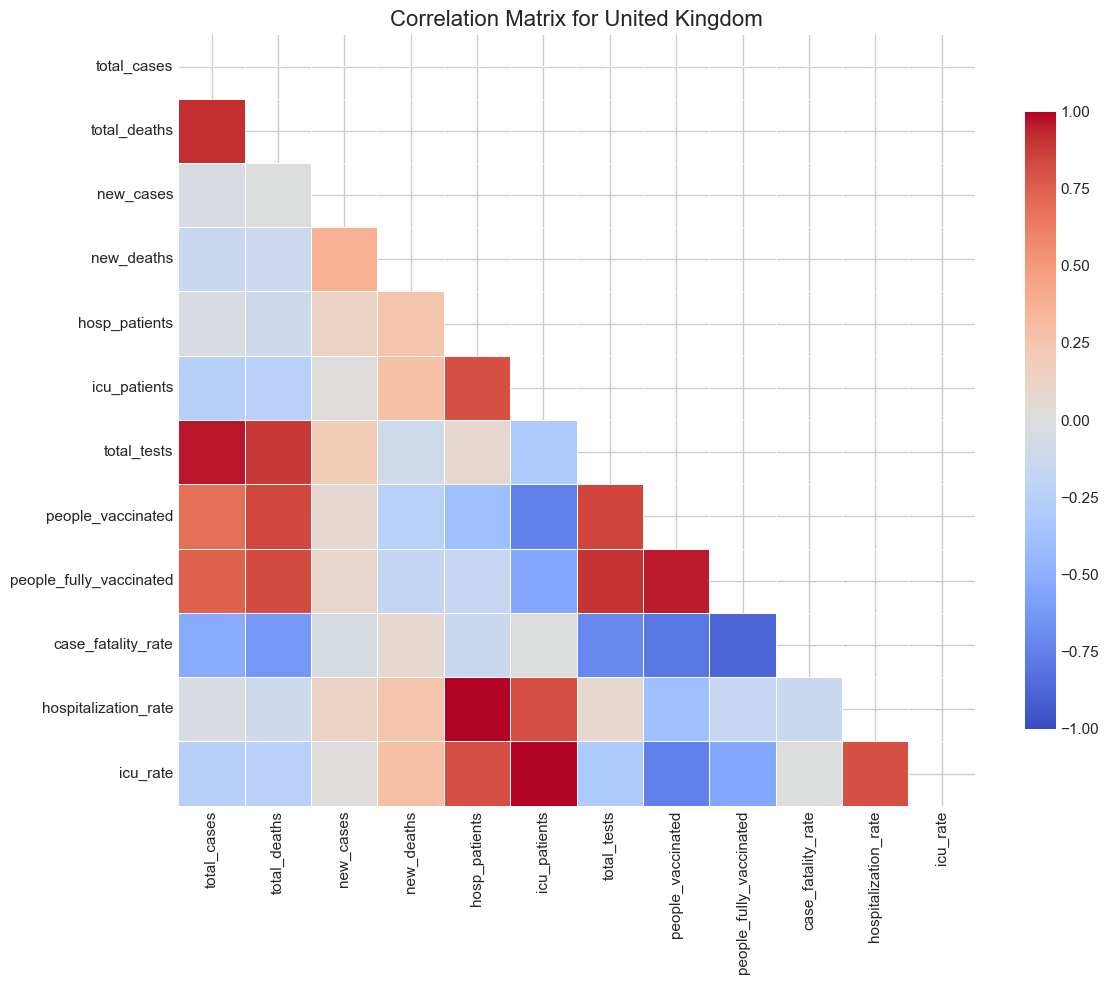

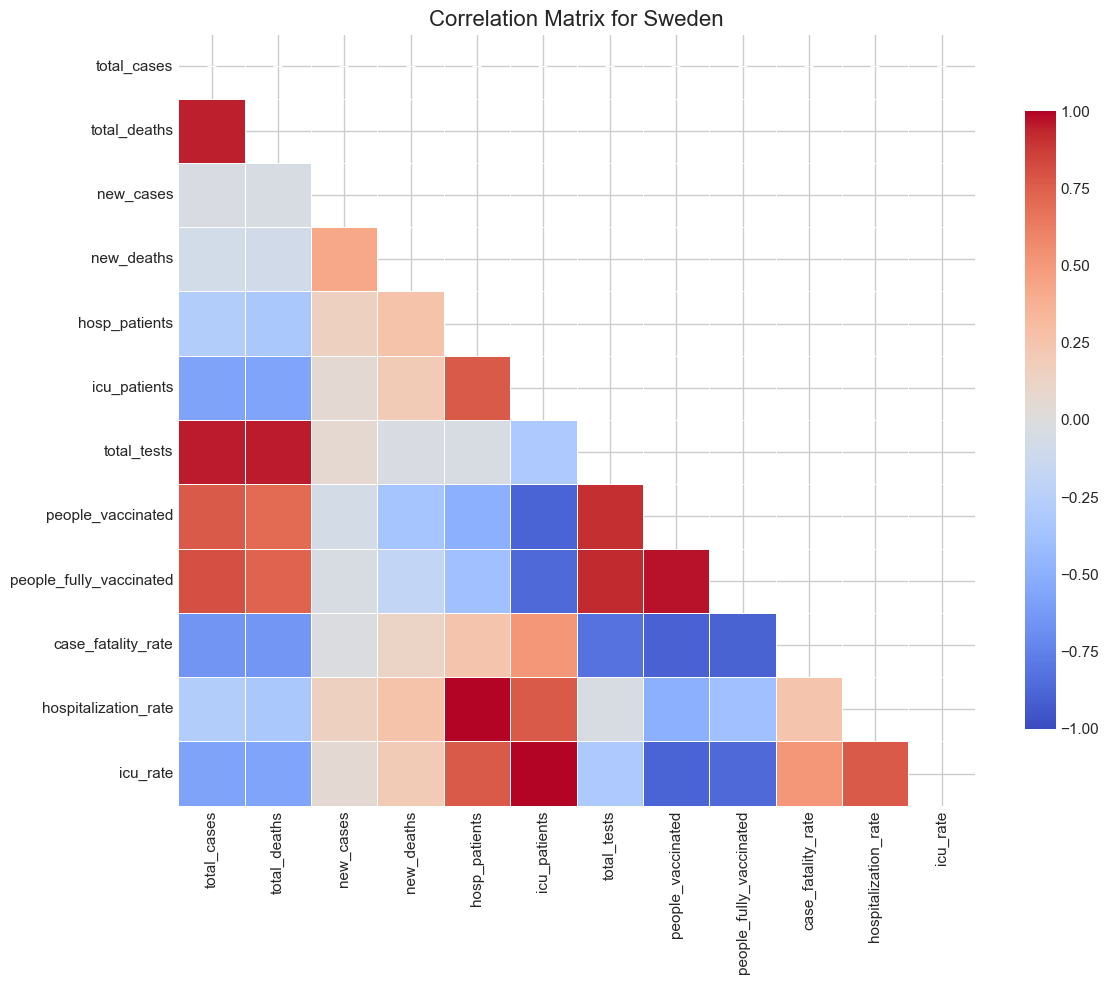

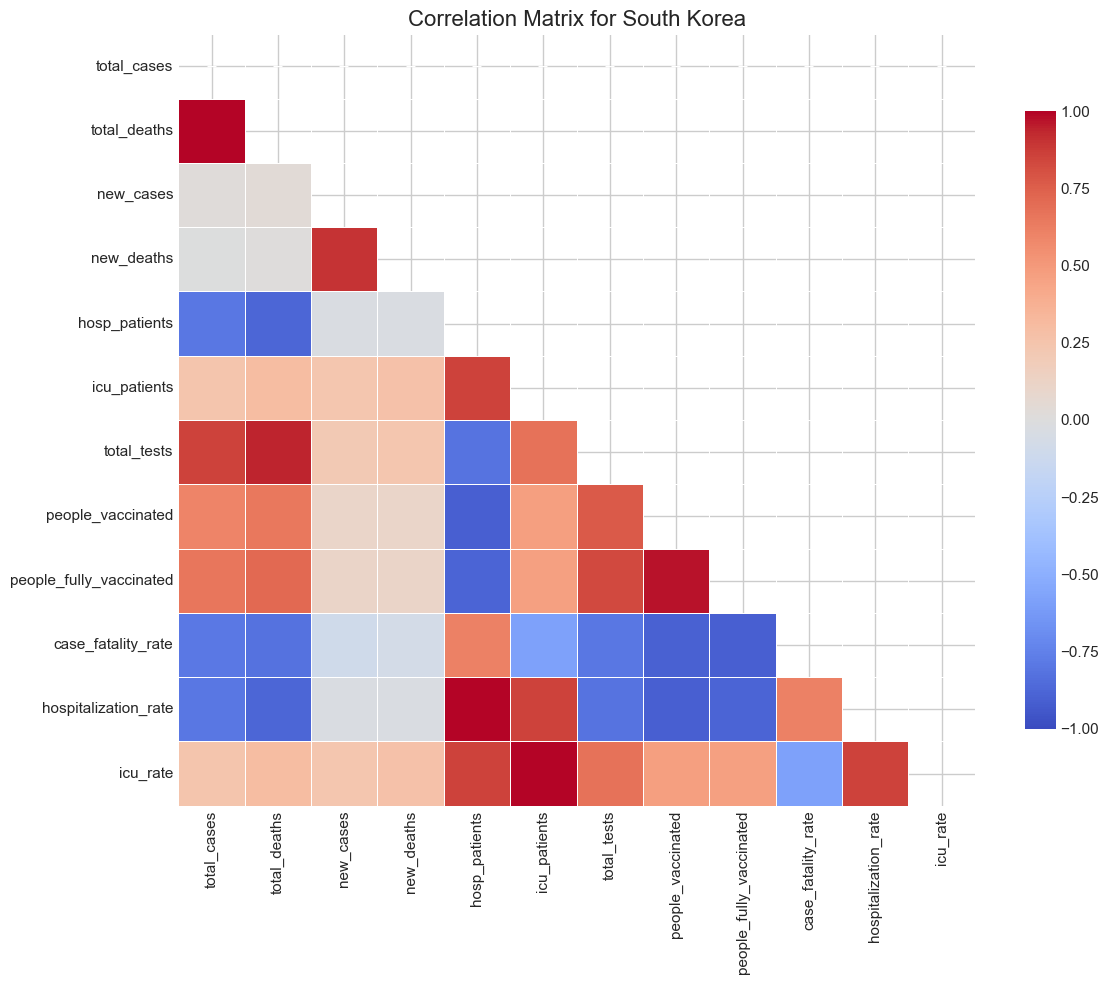

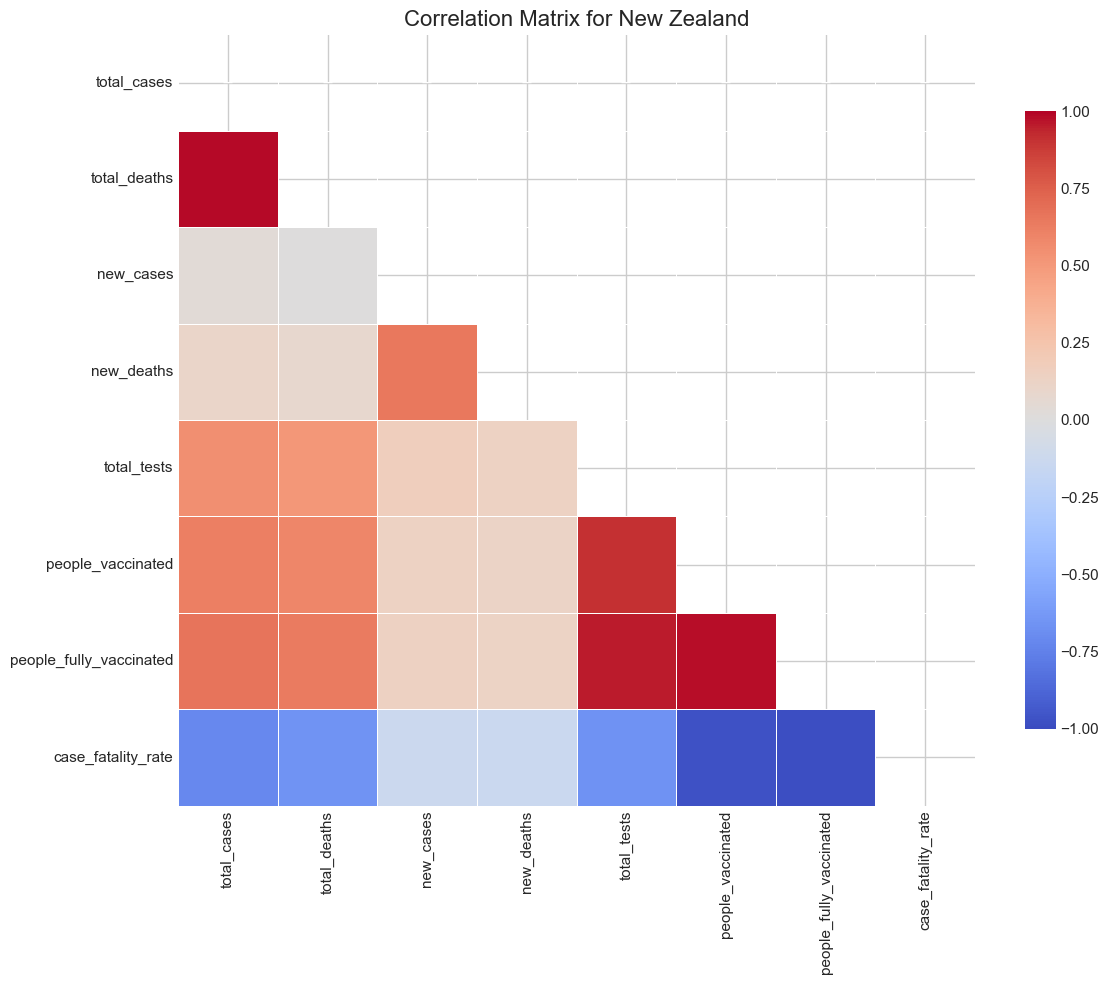

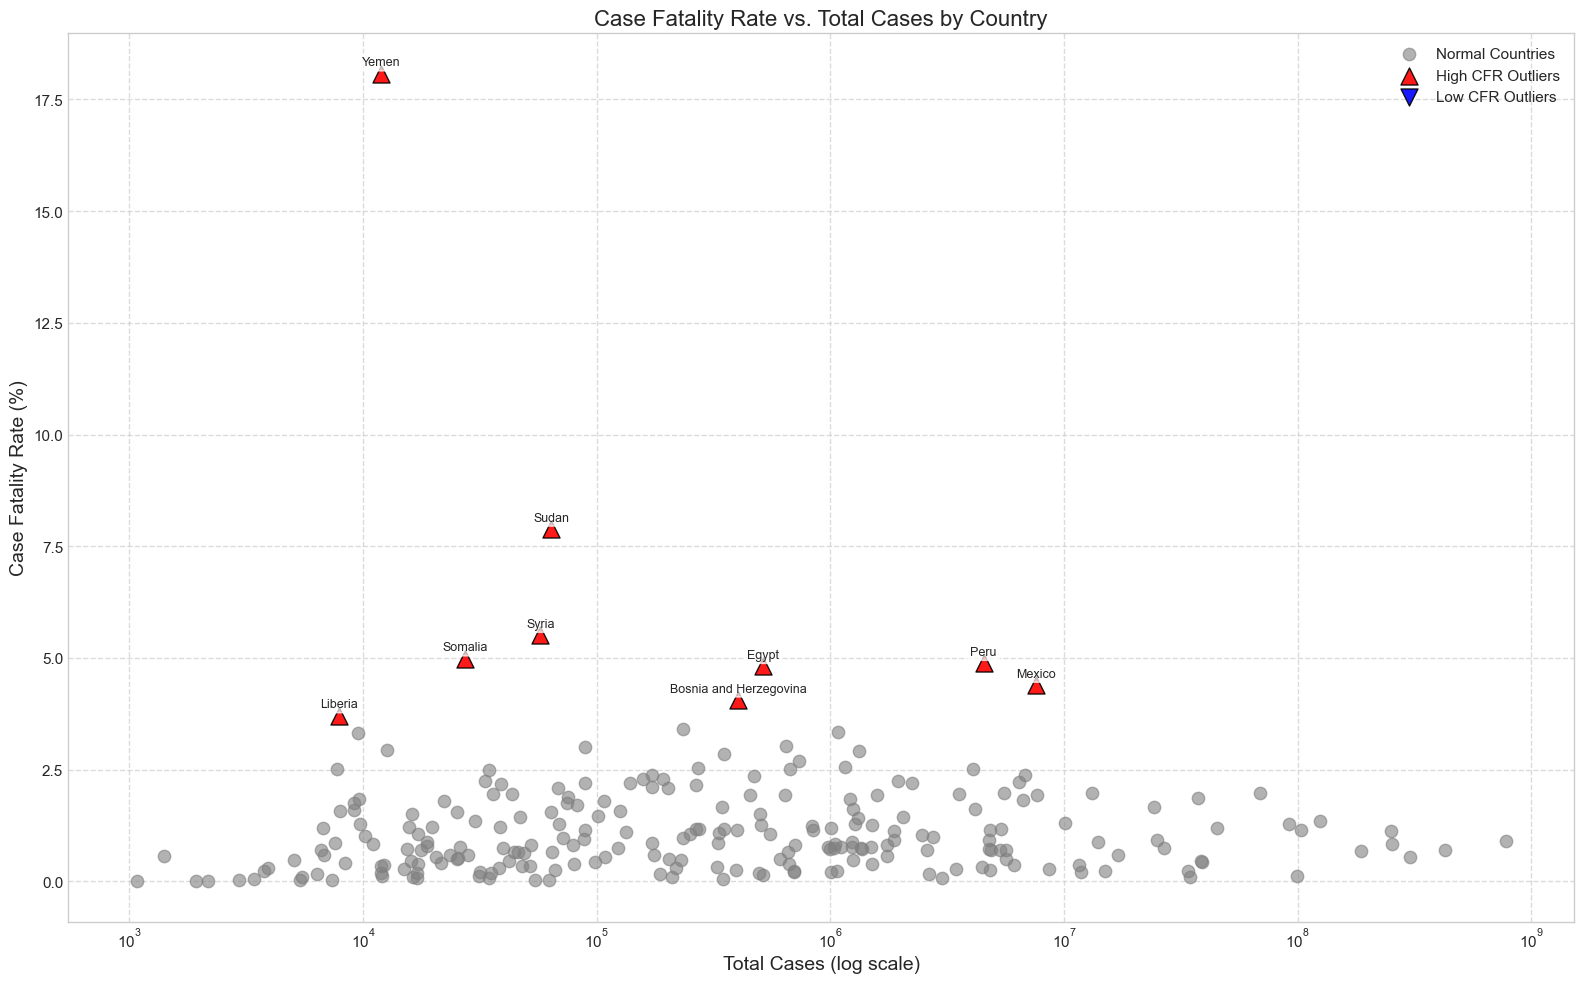

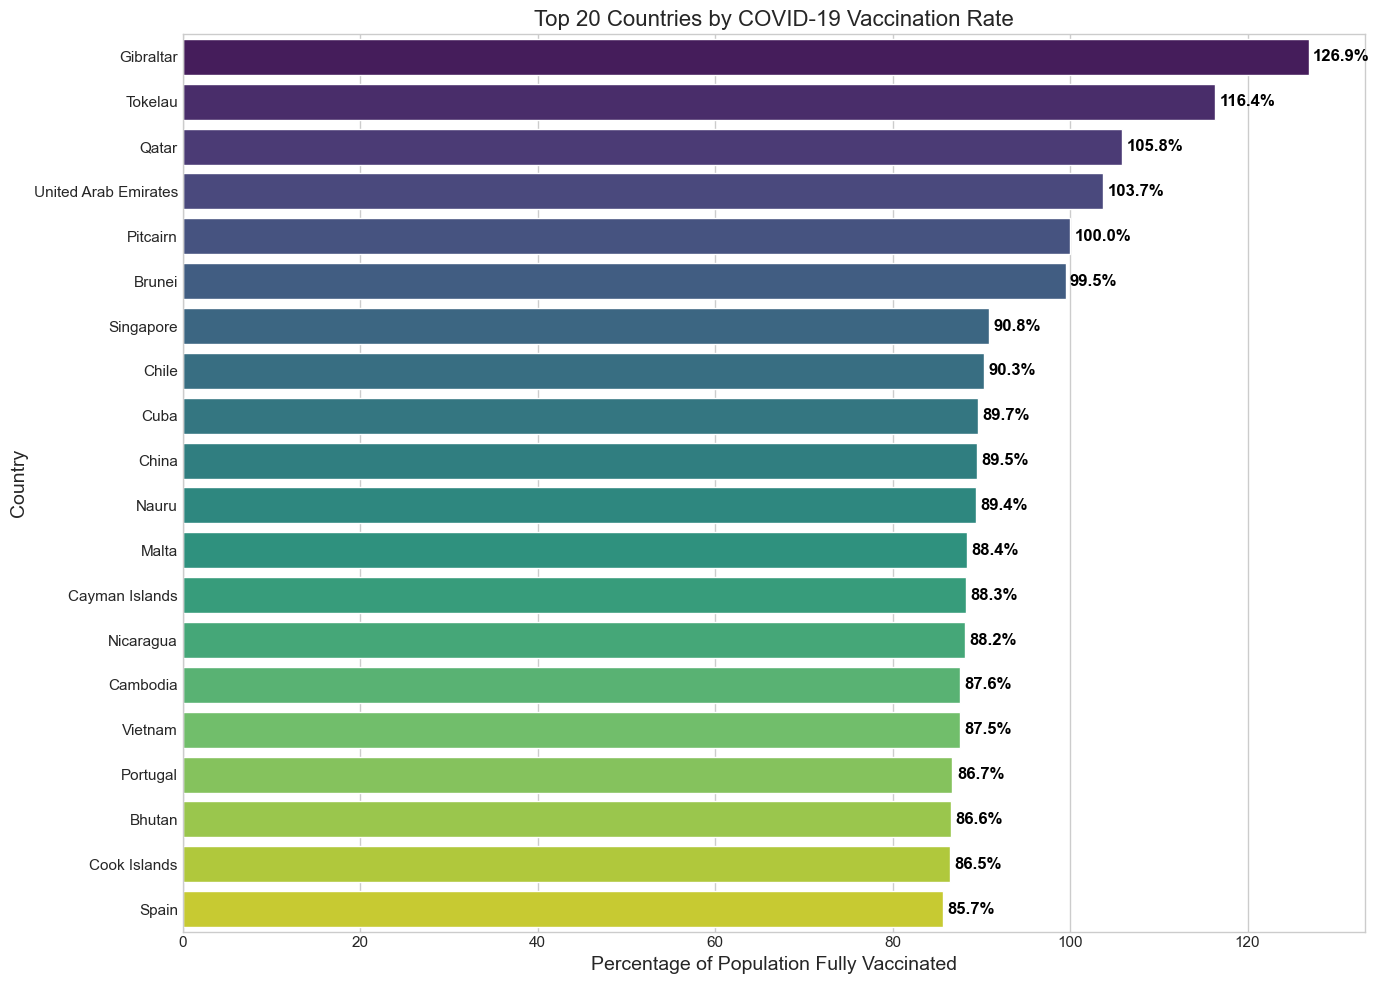

In [10]:

print("\nExecuting analysis on the COVID-19 dataset...")

# Execute Country Trend Analysis
# -----------------------------
print("\nPerforming Country Trend Analysis...")

# Select a few countries to analyze in detail
countries_to_analyze = ['United States', 'India', 'Brazil', 'United Kingdom', 'Sweden', 'South Korea', 'New Zealand']

# Check which countries are actually in our dataset
available_countries = df['location'].unique()
print(f"Number of countries/regions in the dataset: {len(available_countries)}")

# If our chosen countries aren't available, use the top 5 by case numbers
if not all(country in available_countries for country in countries_to_analyze):
    print("Some selected countries not found in dataset, using top countries by case count instead.")
    countries_to_analyze = df.groupby('location')['total_cases'].max().sort_values(ascending=False).head(5).index.tolist()

print(f"Countries being analyzed: {countries_to_analyze}")

# Line plots for multiple countries
print("\nCreating trend visualizations...")

# Total cases comparison
total_cases_fig = plot_multiple_countries_trend(
    'total_cases', 
    countries_to_analyze, 
    'COVID-19 Total Cases Comparison'
)

# Total deaths comparison
total_deaths_fig = plot_multiple_countries_trend(
    'total_deaths', 
    countries_to_analyze, 
    'COVID-19 Total Deaths Comparison'
)

# Case fatality rate comparison
if 'case_fatality_rate' in df.columns:
    cfr_fig = plot_multiple_countries_trend(
        'case_fatality_rate', 
        countries_to_analyze, 
        'COVID-19 Case Fatality Rate Comparison'
    )

# Wave detection for each country
print("\nDetecting COVID-19 waves...")
for country in countries_to_analyze:
    if 'new_cases_smoothed' in df.columns:
        wave_fig = plot_country_waves(country, 'new_cases_smoothed')
        if wave_fig:
            print(f"- Detected waves for {country}")
    
# Execute Correlation Analysis
# ---------------------------
print("\nPerforming Correlation Analysis...")

# Create correlation heatmaps for selected countries
for country in countries_to_analyze:
    corr_fig, available_cols = plot_correlation_heatmap(country)
    if corr_fig:
        print(f"- Created correlation heatmap for {country} with {len(available_cols)} variables")
    else:
        print(f"- Insufficient data for correlation analysis in {country}")

# Execute Outlier Detection
# ------------------------
print("\nPerforming Outlier Detection...")

high_outliers, low_outliers, outlier_fig = detect_outlier_countries()

if high_outliers is not None and len(high_outliers) > 0:
    print(f"\nCountries with unusually HIGH case fatality rates:")
    for _, row in high_outliers.iterrows():
        print(f"- {row['location']}: {row['case_fatality_rate']*100:.2f}% (total cases: {row['total_cases']:.0f})")

if low_outliers is not None and len(low_outliers) > 0:
    print(f"\nCountries with unusually LOW case fatality rates:")
    for _, row in low_outliers.iterrows():
        print(f"- {row['location']}: {row['case_fatality_rate']*100:.2f}% (total cases: {row['total_cases']:.0f})")

# Execute Vaccination Analysis
# --------------------------
print("\nAnalyzing Vaccination Progress...")

if 'people_fully_vaccinated' in df.columns and not df['people_fully_vaccinated'].isna().all():
    vacc_fig, top_vacc = plot_vaccination_progress()
    print(f"Top 5 countries by vaccination rate:")
    for i, (_, row) in enumerate(top_vacc.head(5).iterrows()):
        print(f"{i+1}. {row['location']}: {row['vaccination_rate']:.2f}%")
else:
    print("Vaccination data not available in this dataset.")

# Execute Geospatial Analysis
# --------------------------
print("\nCreating geospatial visualizations...")

if 'iso_code' in df.columns:
    choropleth_fig = create_choropleth_map()
    print("Created global choropleth map of COVID-19 cases per million")
else:
    print("ISO codes not available for geospatial analysis")



11. COMPARATIVE ANALYSIS ACROSS CONTINENTS
Created continent-based comparative analysis


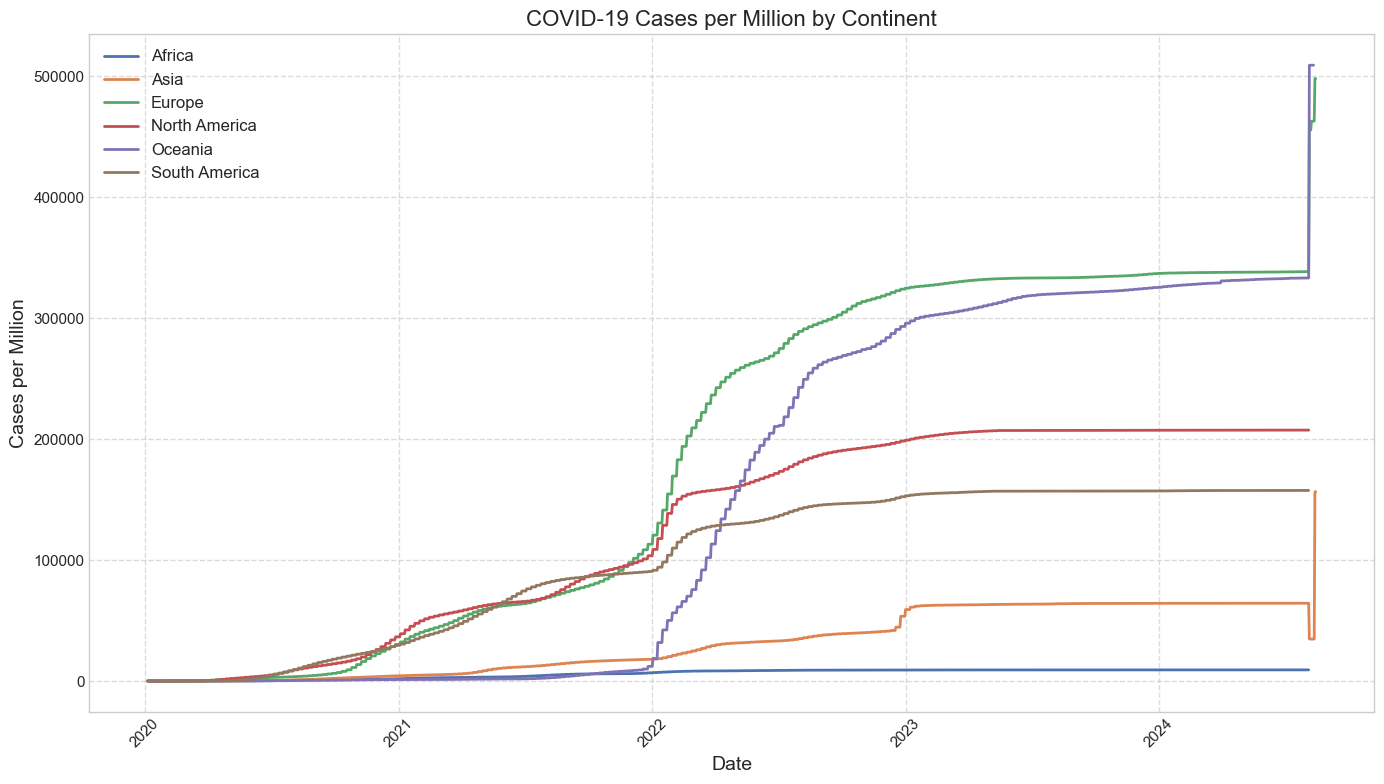

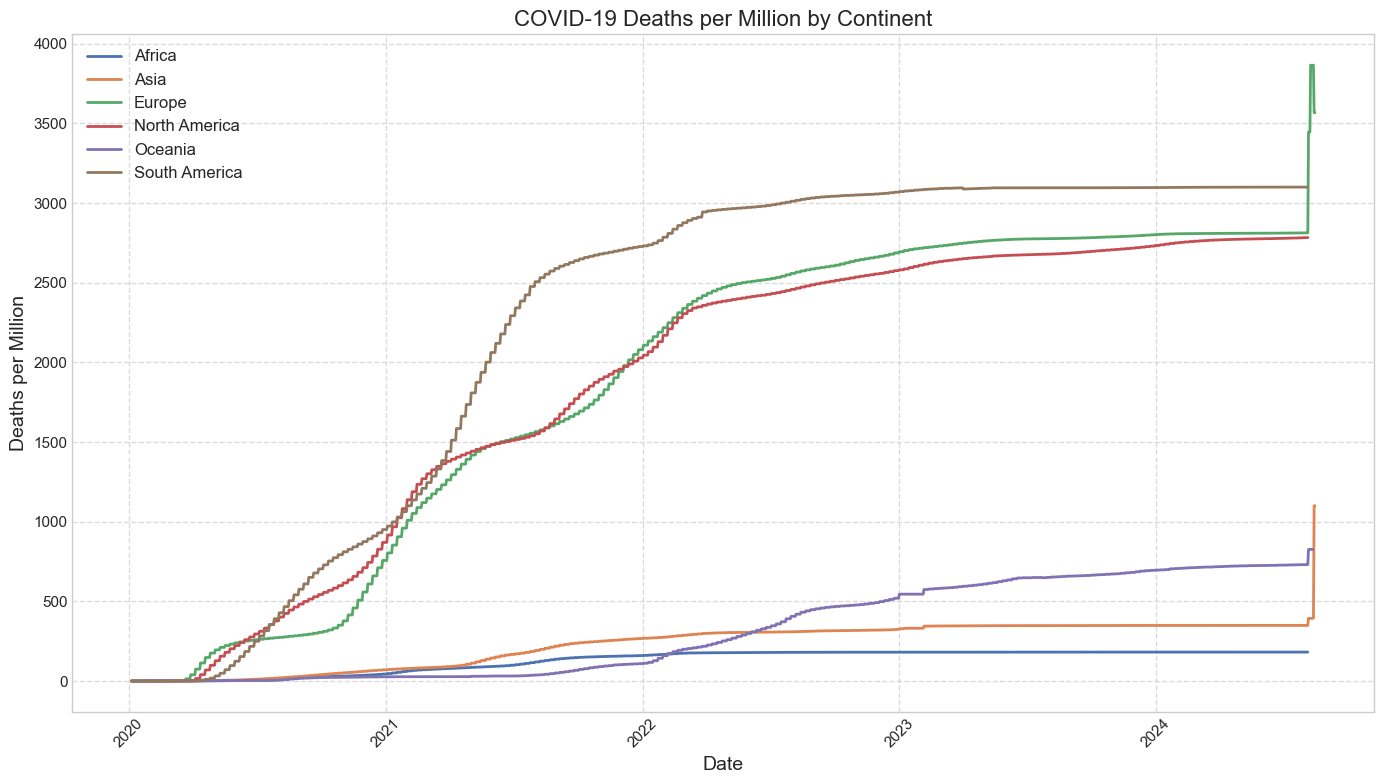

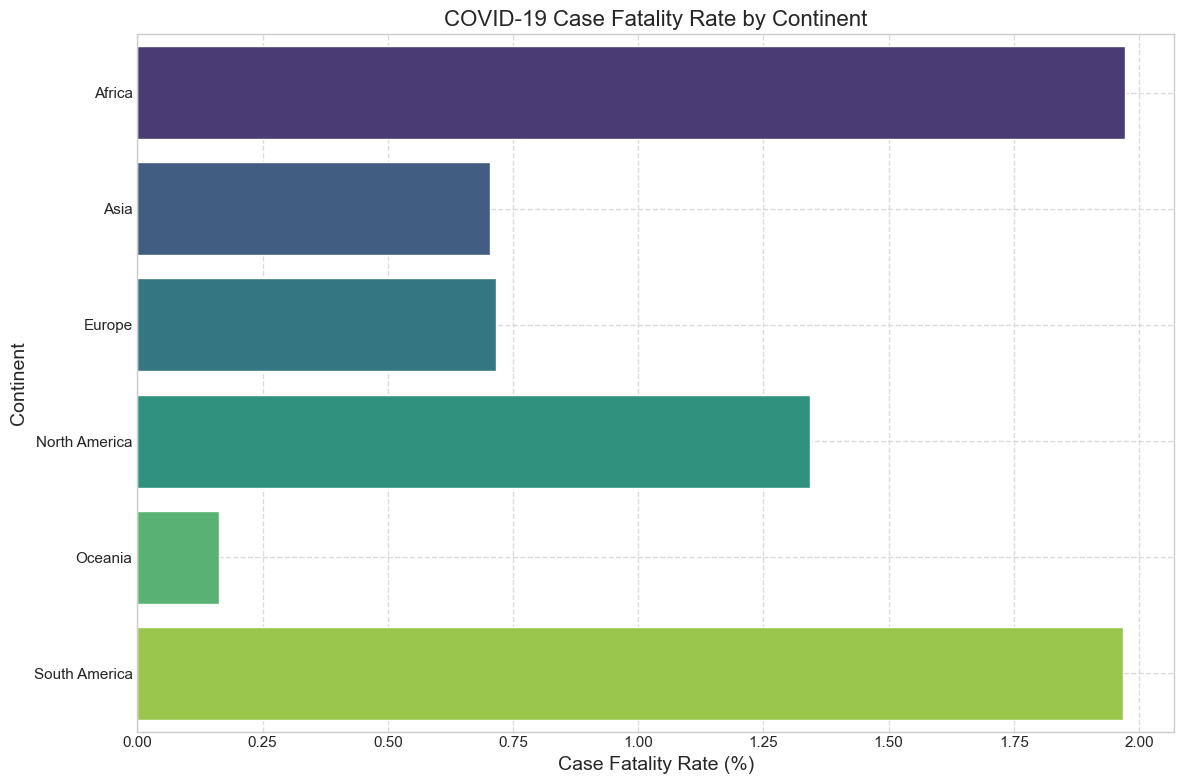

In [183]:
# 11. COMPARATIVE ANALYSIS ACROSS CONTINENTS
# =========================================
print("\n11. COMPARATIVE ANALYSIS ACROSS CONTINENTS")
print("="*40)

if 'continent' in df.columns:
    # Group data by continent
    continent_data = df.groupby(['continent', 'date']).agg({
        'total_cases': 'sum',
        'total_deaths': 'sum',
        'population': 'sum'
    }).reset_index()
    
    # Calculate per million metrics
    continent_data['total_cases_per_million'] = continent_data['total_cases'] / continent_data['population'] * 1000000
    continent_data['total_deaths_per_million'] = continent_data['total_deaths'] / continent_data['population'] * 1000000
    
    # Create visualizations
    plt.figure(figsize=(14, 8))
    
    for continent in continent_data['continent'].unique():
        if continent is not None and continent != '':
            data = continent_data[continent_data['continent'] == continent].sort_values('date')
            plt.plot(data['date'], data['total_cases_per_million'], label=continent, linewidth=2)
    
    plt.title('COVID-19 Cases per Million by Continent', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Cases per Million', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Death rates by continent
    plt.figure(figsize=(14, 8))
    
    for continent in continent_data['continent'].unique():
        if continent is not None and continent != '':
            data = continent_data[continent_data['continent'] == continent].sort_values('date')
            plt.plot(data['date'], data['total_deaths_per_million'], label=continent, linewidth=2)
    
    plt.title('COVID-19 Deaths per Million by Continent', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Deaths per Million', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Calculate case fatality rate by continent
    latest_continent_data = continent_data.sort_values('date').groupby('continent').last().reset_index()
    latest_continent_data['case_fatality_rate'] = latest_continent_data['total_deaths'] / latest_continent_data['total_cases'] * 100
    
    # Create bar chart
    plt.figure(figsize=(12, 8))
    
    sns.barplot(
        x='case_fatality_rate',
        y='continent',
        data=latest_continent_data[latest_continent_data['continent'].notna()],
        palette='viridis'
    )
    
    plt.title('COVID-19 Case Fatality Rate by Continent', fontsize=16)
    plt.xlabel('Case Fatality Rate (%)', fontsize=14)
    plt.ylabel('Continent', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    print("Created continent-based comparative analysis")
else:
    print("Continent data not available for comparative analysis")


12. HEALTHCARE SYSTEM ANALYSIS
Created healthcare system capacity analysis


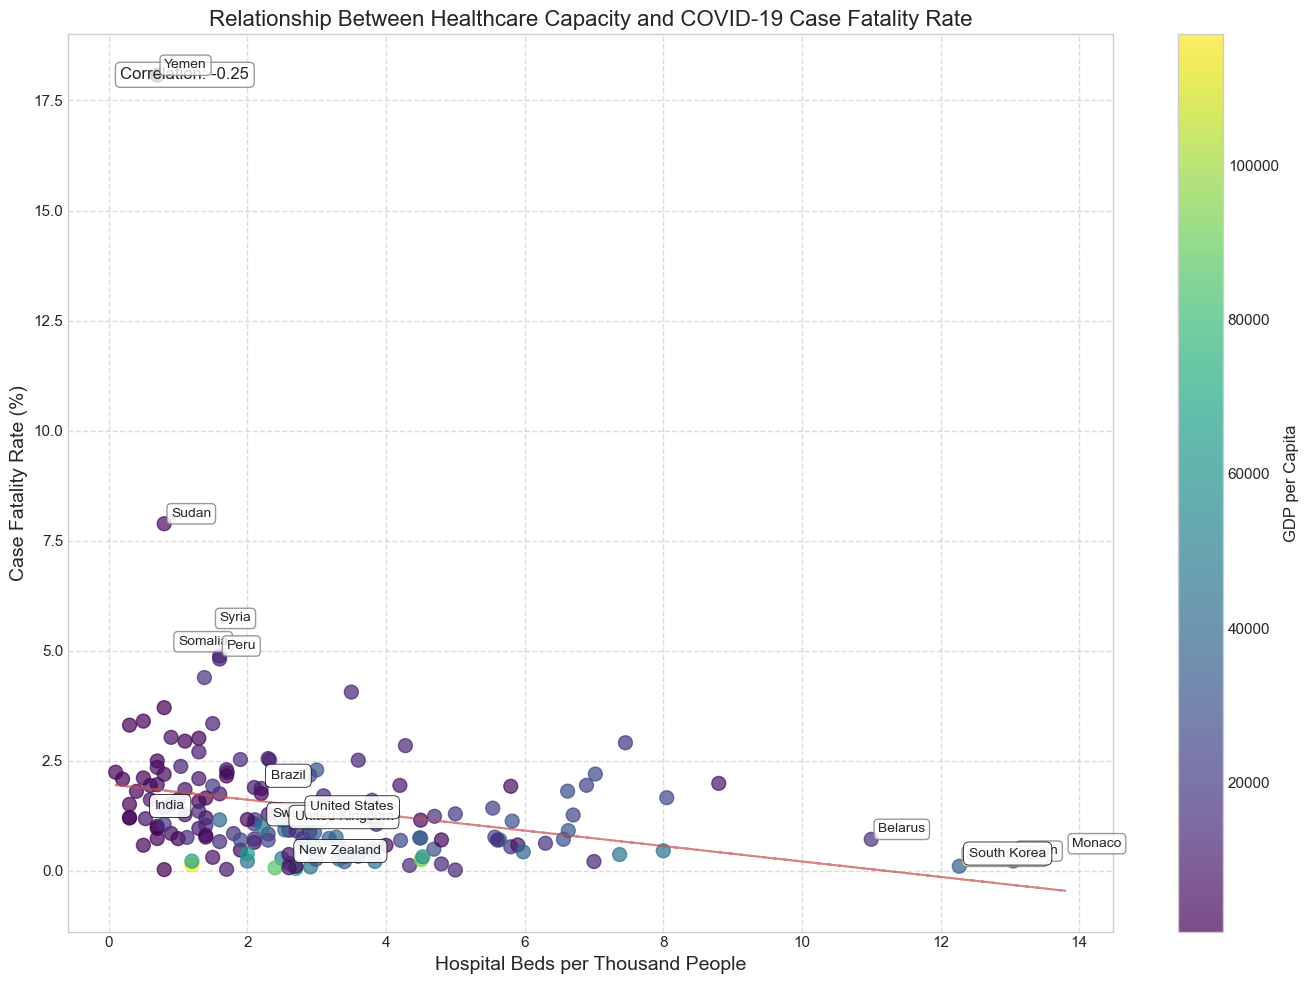

In [11]:
# 12. HEALTHCARE SYSTEM ANALYSIS
# ============================
print("\n12. HEALTHCARE SYSTEM ANALYSIS")
print("="*40)

if 'hospital_beds_per_thousand' in df.columns and not df['hospital_beds_per_thousand'].isna().all():
    # Get latest data for each country
    latest_data = df.sort_values('date').groupby('location').last().reset_index()
    
    # Create scatter plot of hospital beds vs case fatality rate
    plt.figure(figsize=(14, 10))
    
    scatter = plt.scatter(
        latest_data['hospital_beds_per_thousand'], 
        latest_data['case_fatality_rate']*100,  # Convert to percentage
        c=latest_data['gdp_per_capita'],
        cmap='viridis',
        alpha=0.7,
        s=100
    )
    
    # Add colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label('GDP per Capita', fontsize=12)
    
    # Add trendline
    valid_data = latest_data.dropna(subset=['hospital_beds_per_thousand', 'case_fatality_rate'])
    if len(valid_data) > 5:
        x = valid_data['hospital_beds_per_thousand']
        y = valid_data['case_fatality_rate']*100
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        plt.plot(x, p(x), "r--", alpha=0.7)
        
        # Calculate correlation
        corr = np.corrcoef(x, y)[0, 1]
        plt.annotate(
            f"Correlation: {corr:.2f}",
            xy=(0.05, 0.95),
            xycoords='axes fraction',
            fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
        )
    
    # Annotate some points
    for i, row in latest_data.nlargest(5, 'hospital_beds_per_thousand').iterrows():
        plt.annotate(
            row['location'],
            (row['hospital_beds_per_thousand'], row['case_fatality_rate']*100),
            xytext=(5, 5),
            textcoords='offset points',
            fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
        )
    
    for i, row in latest_data.nlargest(5, 'case_fatality_rate').iterrows():
        plt.annotate(
            row['location'],
            (row['hospital_beds_per_thousand'], row['case_fatality_rate']*100),
            xytext=(5, 5),
            textcoords='offset points',
            fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
        )
    highlight_countries = ['United States', 'India', 'Brazil', 'Sweden', 'United Kingdom', 'New Zealand', 'South Korea']
    highlight_data = latest_data[latest_data['location'].isin(highlight_countries)]

    for i, row in highlight_data.iterrows():
        plt.annotate(
            row['location'],
            (row['hospital_beds_per_thousand'], row['case_fatality_rate']*100),
            xytext=(7, 7),
            textcoords='offset points',
            fontsize=10,
            bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="black", lw=0.6, alpha=0.9)
    )
    
    plt.title('Relationship Between Healthcare Capacity and COVID-19 Case Fatality Rate', fontsize=16)
    plt.xlabel('Hospital Beds per Thousand People', fontsize=14)
    plt.ylabel('Case Fatality Rate (%)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    print("Created healthcare system capacity analysis")
else:
    print("Healthcare system data not available for analysis")